# Avocado Project

## Project Description

# Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


In [234]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
#getting data of top 5 column
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
#getting data of bottom 5 column
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#dropping column that is not useful.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [9]:
df.shape

(18249, 13)

## Data Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


From above code output we can see that, 

AveragePrice,Total Volume,4046,4225,4225,Total Bags,Small Bags,Large Bags,    XLarge Bags having float64 data type <br>

and Date,type,region column having Object data type <br>

and year is having int64 data type


In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

in this dtypes function help us to check whether the dataset is holding a right datatypes or not. here "Date" is in "object" instead of datetime dtype.lets handle it.

In [12]:
# Here Date column is shows object dtype. It has to be converted into Datetime data type.
df['Date']=pd.to_datetime(df['Date'])

In [13]:
#extracting month from Date colunn

df['Month']=pd.to_datetime(df['Date']).dt.month

In [14]:
#extracting day from Date colunn
df['date'] = pd.to_datetime(df['Date']).dt.day

In [15]:
df.drop('Date',axis=1,inplace=True)

In [16]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  date  
0                Albany     12    27  
1                Albany     12    20  
2                Albany     12    13  
3                Albany     12     6  
4                Albany     11    29  
...                 ...    ...   ...  
18244  WestTexNewMexico      2     4  
18245  WestTexNewMexico      1    28  
18246  WestTexNewMexico      1    21  
18247  WestTexNewMexico      1    14  
18248  WestTexNewMexico      1     7  

[18249 rows x 14 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  date          18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


## checking null values

In [18]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
date            0
dtype: int64

<AxesSubplot:>

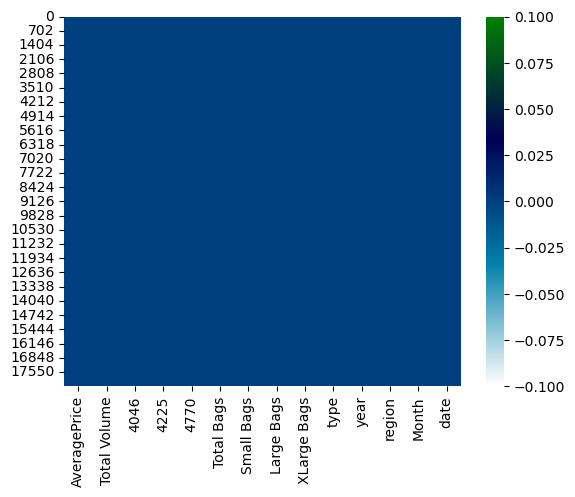

In [19]:
sns.heatmap(df.isnull(),cmap='ocean_r')

heatmap visually defines there is no null value present in the dataset 

<AxesSubplot:>

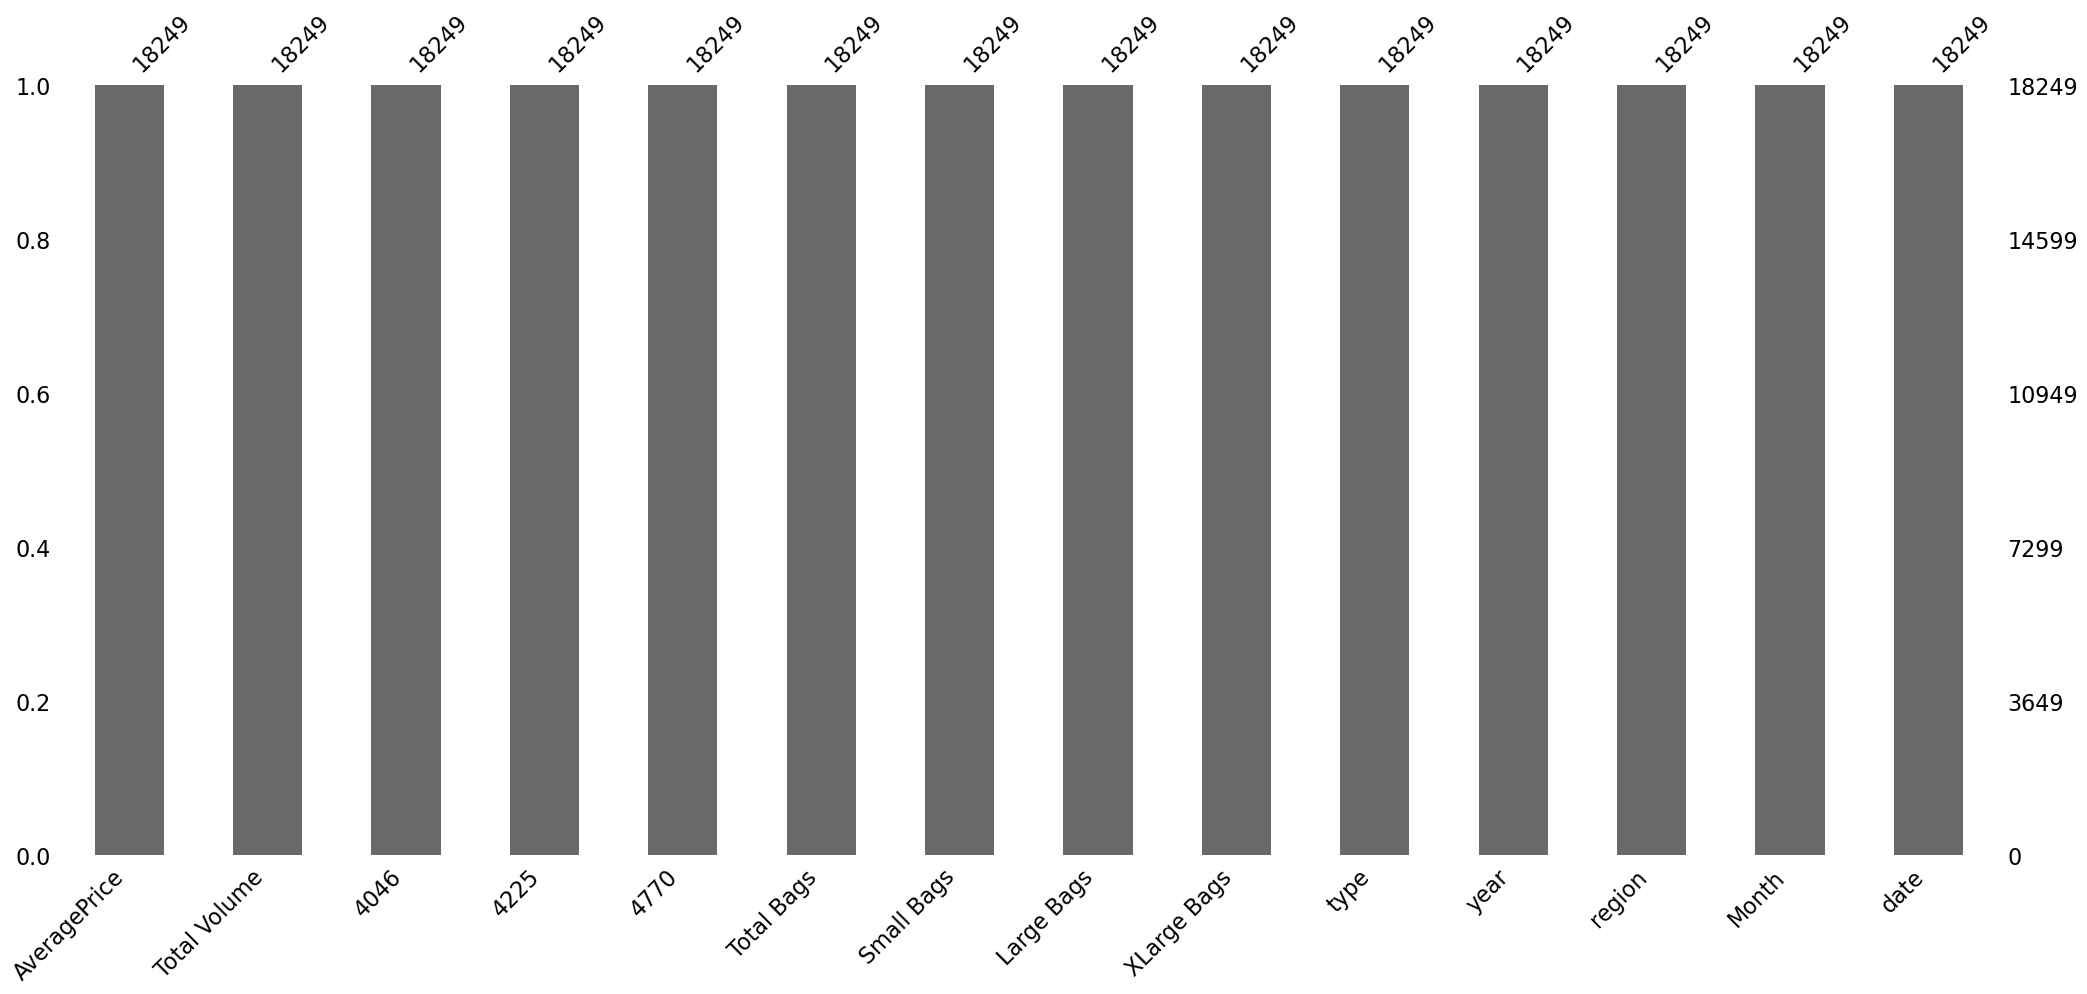

In [20]:
ms.bar(df)

bar chart for missing value

<AxesSubplot:>

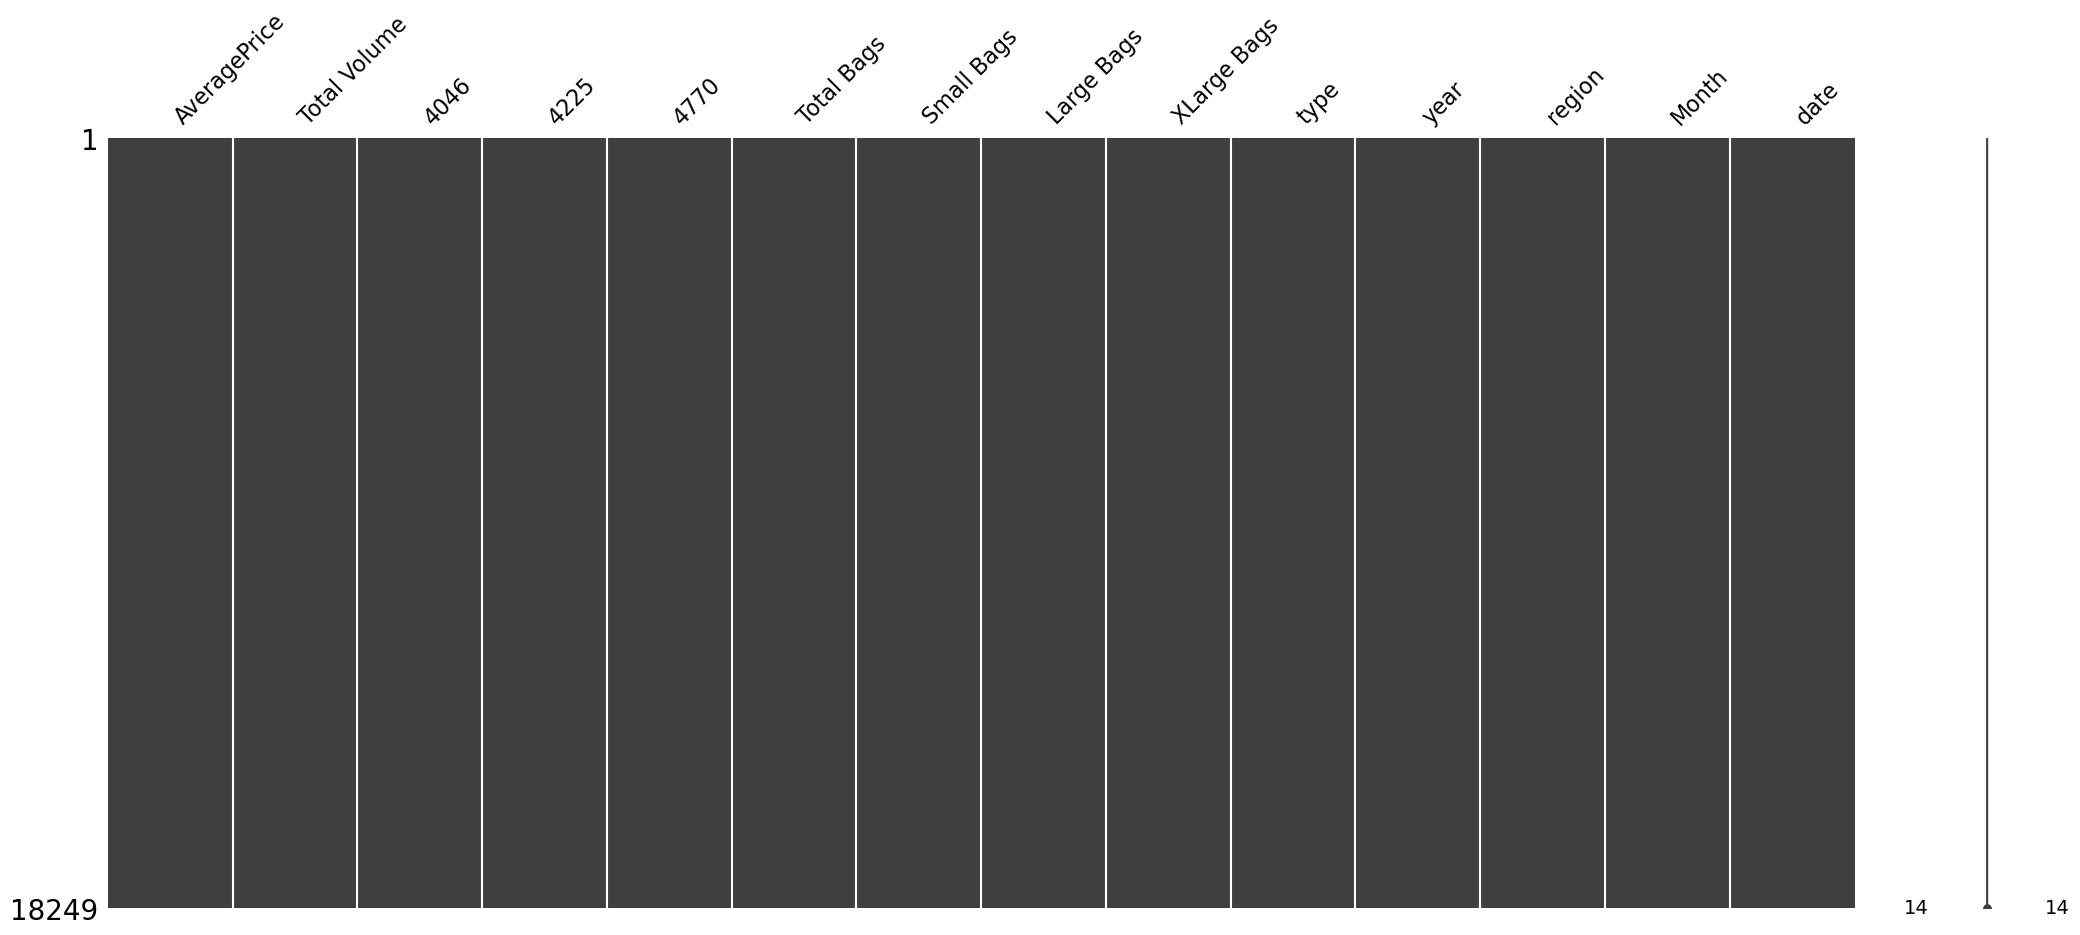

In [21]:
ms.matrix(df)

## find duplicate values

In [22]:
df.duplicated().sum()

0

there is no duplicated value present in the data set

## seperate the data columns

In [23]:
categorial_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorial_data.append(i)
print("categorial columns:",categorial_data)
print("\n")

Numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object":
        Numerical_data.append(i)
print("Numerical columns:",Numerical_data)

categorial columns: ['type', 'region']


Numerical columns: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'date']


## find unique values

In [24]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
date               31
dtype: int64

here type and region are categorial columns. lets convert into Numerical columns

In [25]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  date  
0     8603.62       93.25          0.0     0  2015       0     12    27  
1     9408.07       97.49          0.0     0  2015       0     12    20  
2     8042.21      103.14          0.0     0  2015       0     12    13  
3     5677.40      133.76          0.0     0  2015       0     12     6  
4     5986.26      197.69          0.0     0  2015       0     11    29

In [27]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [28]:
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

column "type" and "region" categorial data has been changed into Numerical datatype.

In [29]:
df.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
type          18249.0       0.499918  5.000137e-01     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   
region        18249.0      26.495644  1.558379e+01     0.00     13.00   
Month         18249.0       6.177215  3.534130e+00     1.00      3.00   
date          18249.0      15.662612  8.776281e+00     1.00      8.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
type               0.00       1.00         1.00  
year            2016.00    2017.00      2018.00  
region            26.00      40.00        53.00  
Month              6.00       9.00        12.00  
date              16.00      23.00        31.00

As per the above statistics, 
a few columns have huge numbers and it is difficult to assume anything by just looking at the table. Few features indicate that the value is greater than the median, indicating that the data is skewed to the right.

In [30]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
date              0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
date           -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                  year    region     Month      date  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.017193  0.174176 -0.024689 -0.009747  
4046          0.003353  0.192073 -0.025803 -0.010159  
4225         -0.009559  0.145726 -0.022108 -0.012393  
4770         -0.036531  0.095252 -0.033424 -0.009009  
Total Bags    0.071552  0.175256 -0.022724 -0.004988  
Small Bags    0.063915  0.164702 -0.023126 -0.003870  
Large Bags    0.087891  0.198768 -0.020187 -0.008352  
XLarge Bags   0.081033  0.082281 -0.012969  0.000319  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
Month        -0.177050 -0.000144  1.000000  0.010621  
date          0.004475 -0.000021  0.010621  1.000000

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<AxesSubplot:>

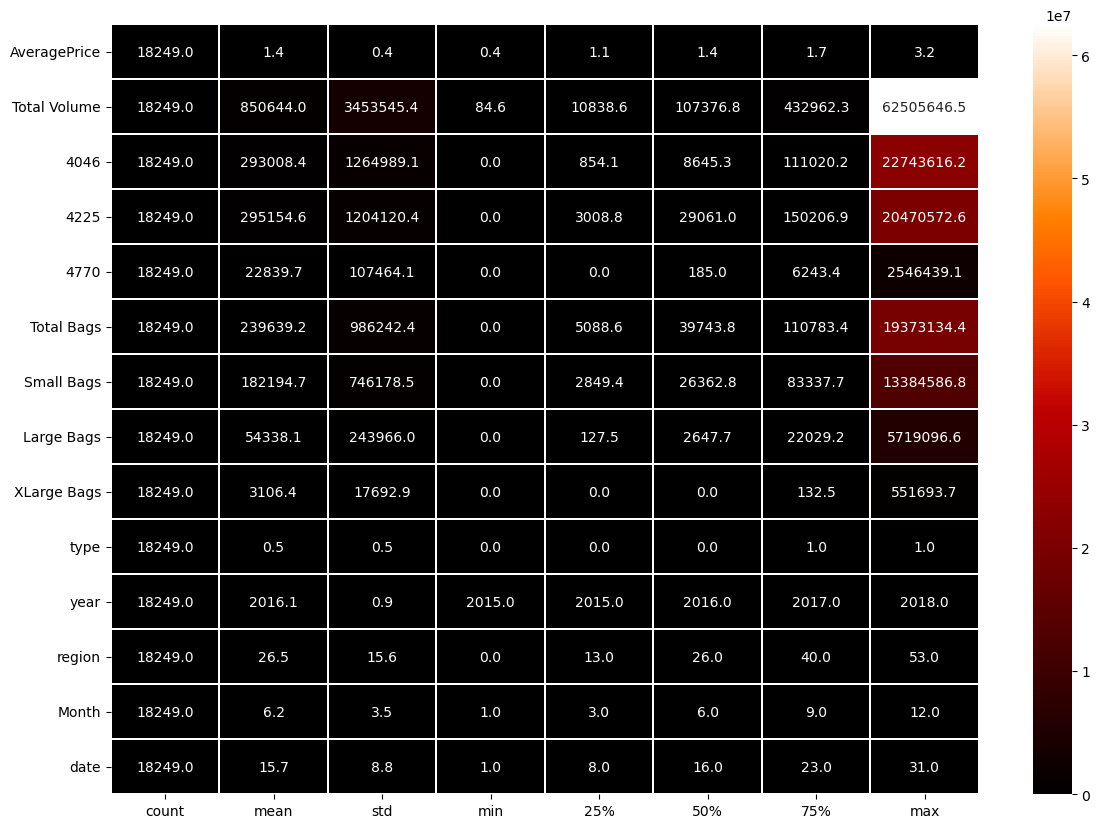

In [44]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe().T,linewidth=0.3,fmt='0.1f' ,annot=True,cmap='gist_heat')

### Comment-

Statistical analysis reveals  right skewness in feature distributions. Consistent counts signify a complete dataset.
Potential outliers, especially in 'Total volume','4225', '4046' and 'Total Bags' warrant attention.
Heatmap highlights the need for feature scaling.

## Visualizing the correlation matrix by plotting heat map.

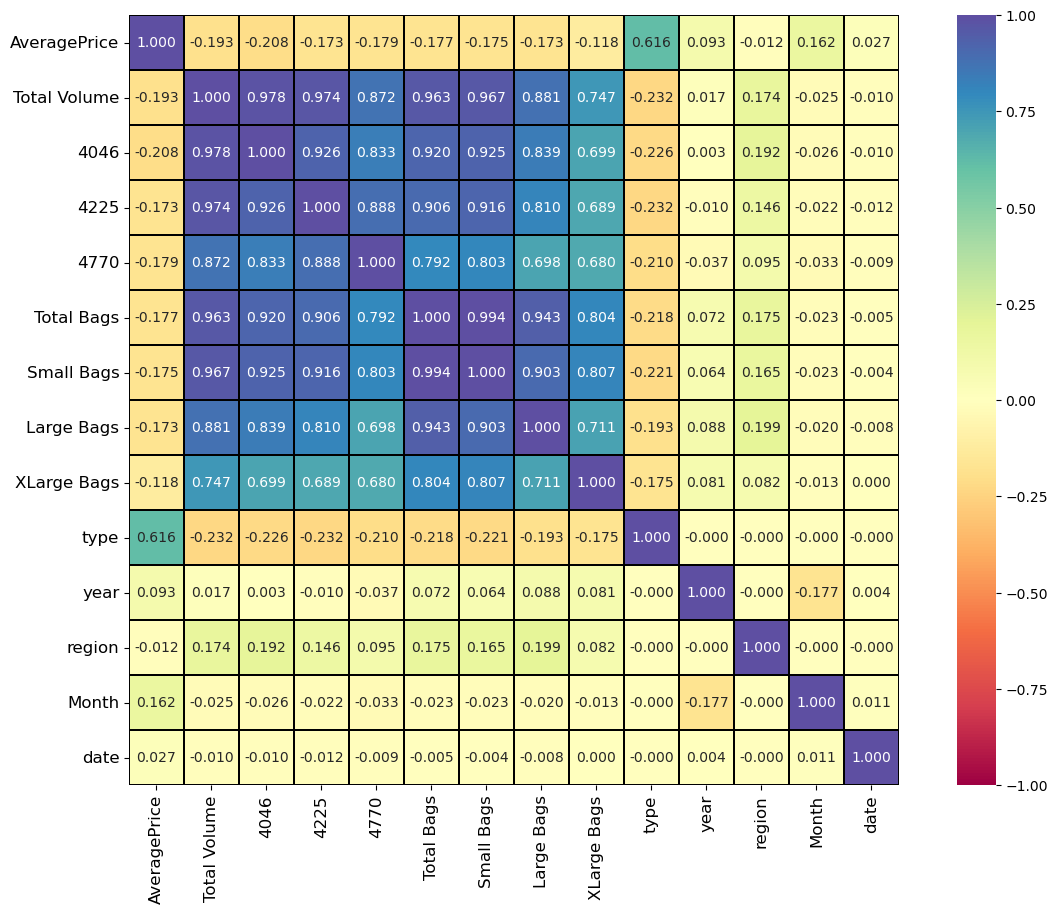

In [32]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From above heat map we can see multicollinearity issue between features "4046", "4225", "4770", "Small Bags", "Large Bags" ,"type" and "XLarge Bags". We will drop these columns after cross checking coorrelation using VIF.

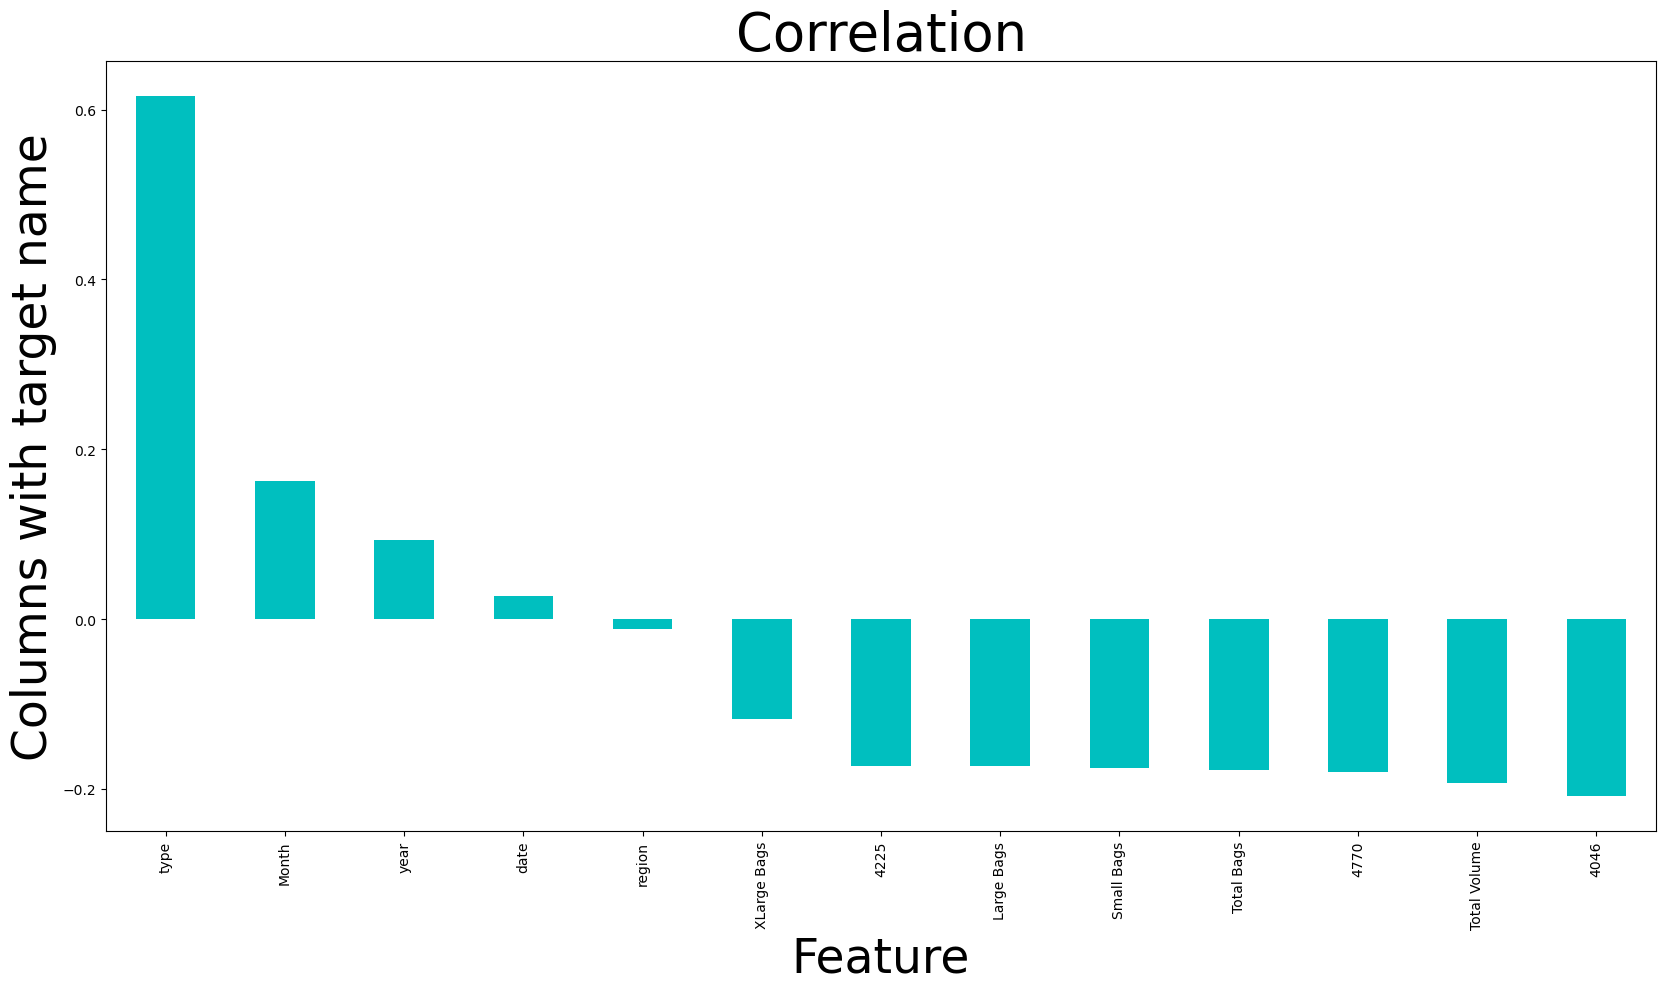

In [40]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=34)
plt.ylabel('Columns with target name', fontsize=34)
plt.title('Correlation',fontsize=38)
plt.show()

From above Plotting we can see features like XLargebags, 4225, Large bags, Small bags,Total Bags, 4770, Total Volumes, and 4046 are negatively correlated.Region has almost no relation.

<font size=5>**Visualization**

0    9126
1    9123
Name: type, dtype: int64


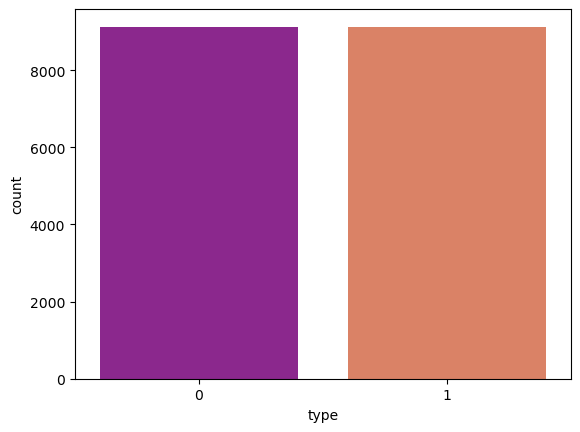

In [46]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

6     1294
9     1296
12    1403
11    1404
8     1404
4     1404
10    1512
7     1512
5     1512
2     1728
3     1836
1     1944
Name: Month, dtype: int64


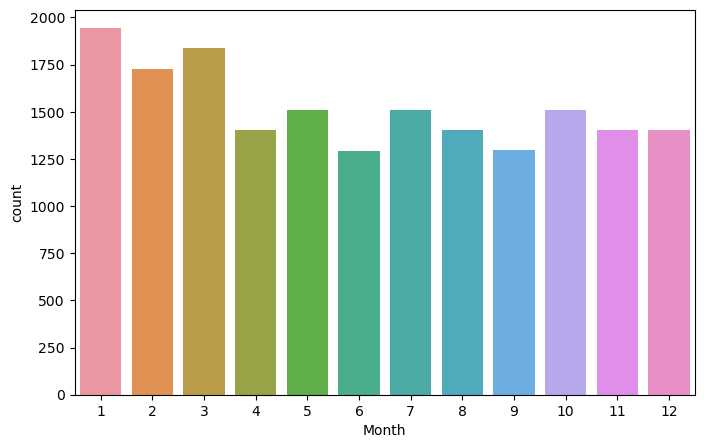

In [53]:
#Checking the count plot of Month
plt.figure(figsize=(8,5))
sns.countplot(df["Month"])
print(df["Month"].value_counts().sort_values())
plt.show()

As per above plotting we can see that june have lowest record and january have highest record

### Bivariate Analysis

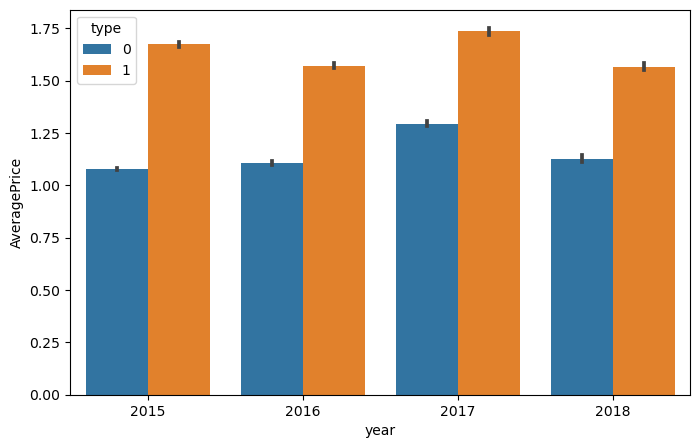

In [60]:
#Comparing average prices in different years

plt.figure(figsize=(8,5))
sns.barplot(x="year", y="AveragePrice", hue="type", data=df)
plt.show()

we can see that Price was significantly higher in year 2017.<br>
As usual, Organic product has higher price than conventional product in All year

<Figure size 800x500 with 0 Axes>

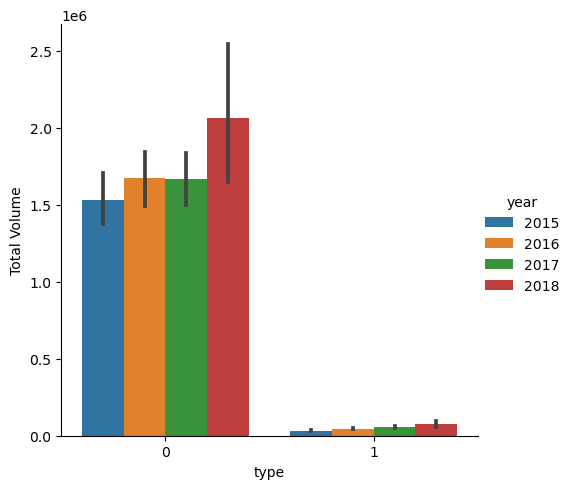

In [61]:
plt.figure(figsize=(8,5))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df)
plt.show()

<Figure size 800x500 with 0 Axes>

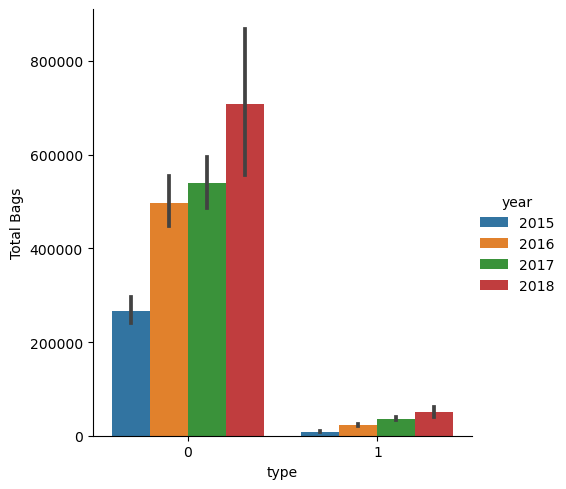

In [63]:
plt.figure(figsize=(8,5))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar")
plt.show()

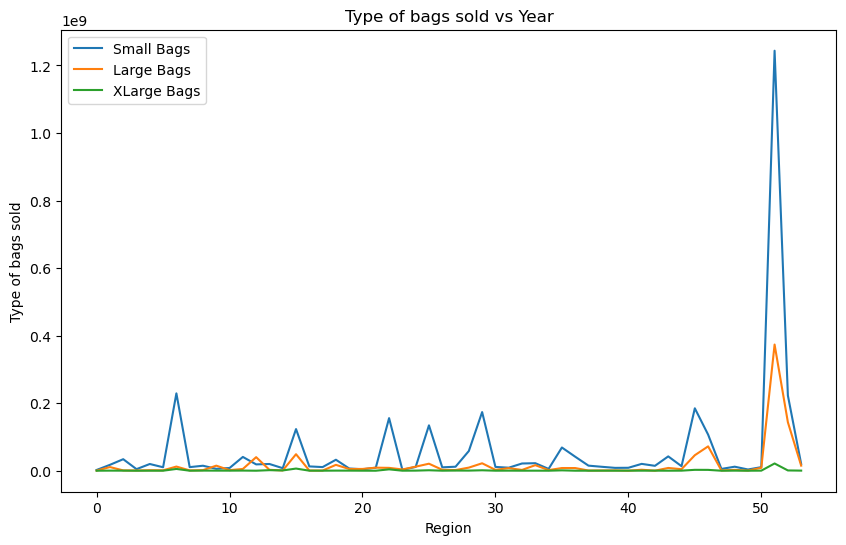

In [64]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Type of bags sold vs Year")
plt.xlabel("Region")
plt.ylabel("Type of bags sold")
plt.show()

In the Tampa area, small bag sizes are in high demand.<br>
followed by large bag sizes, and Xlarge bag sizes are the least popular.

## Multivariate analysis

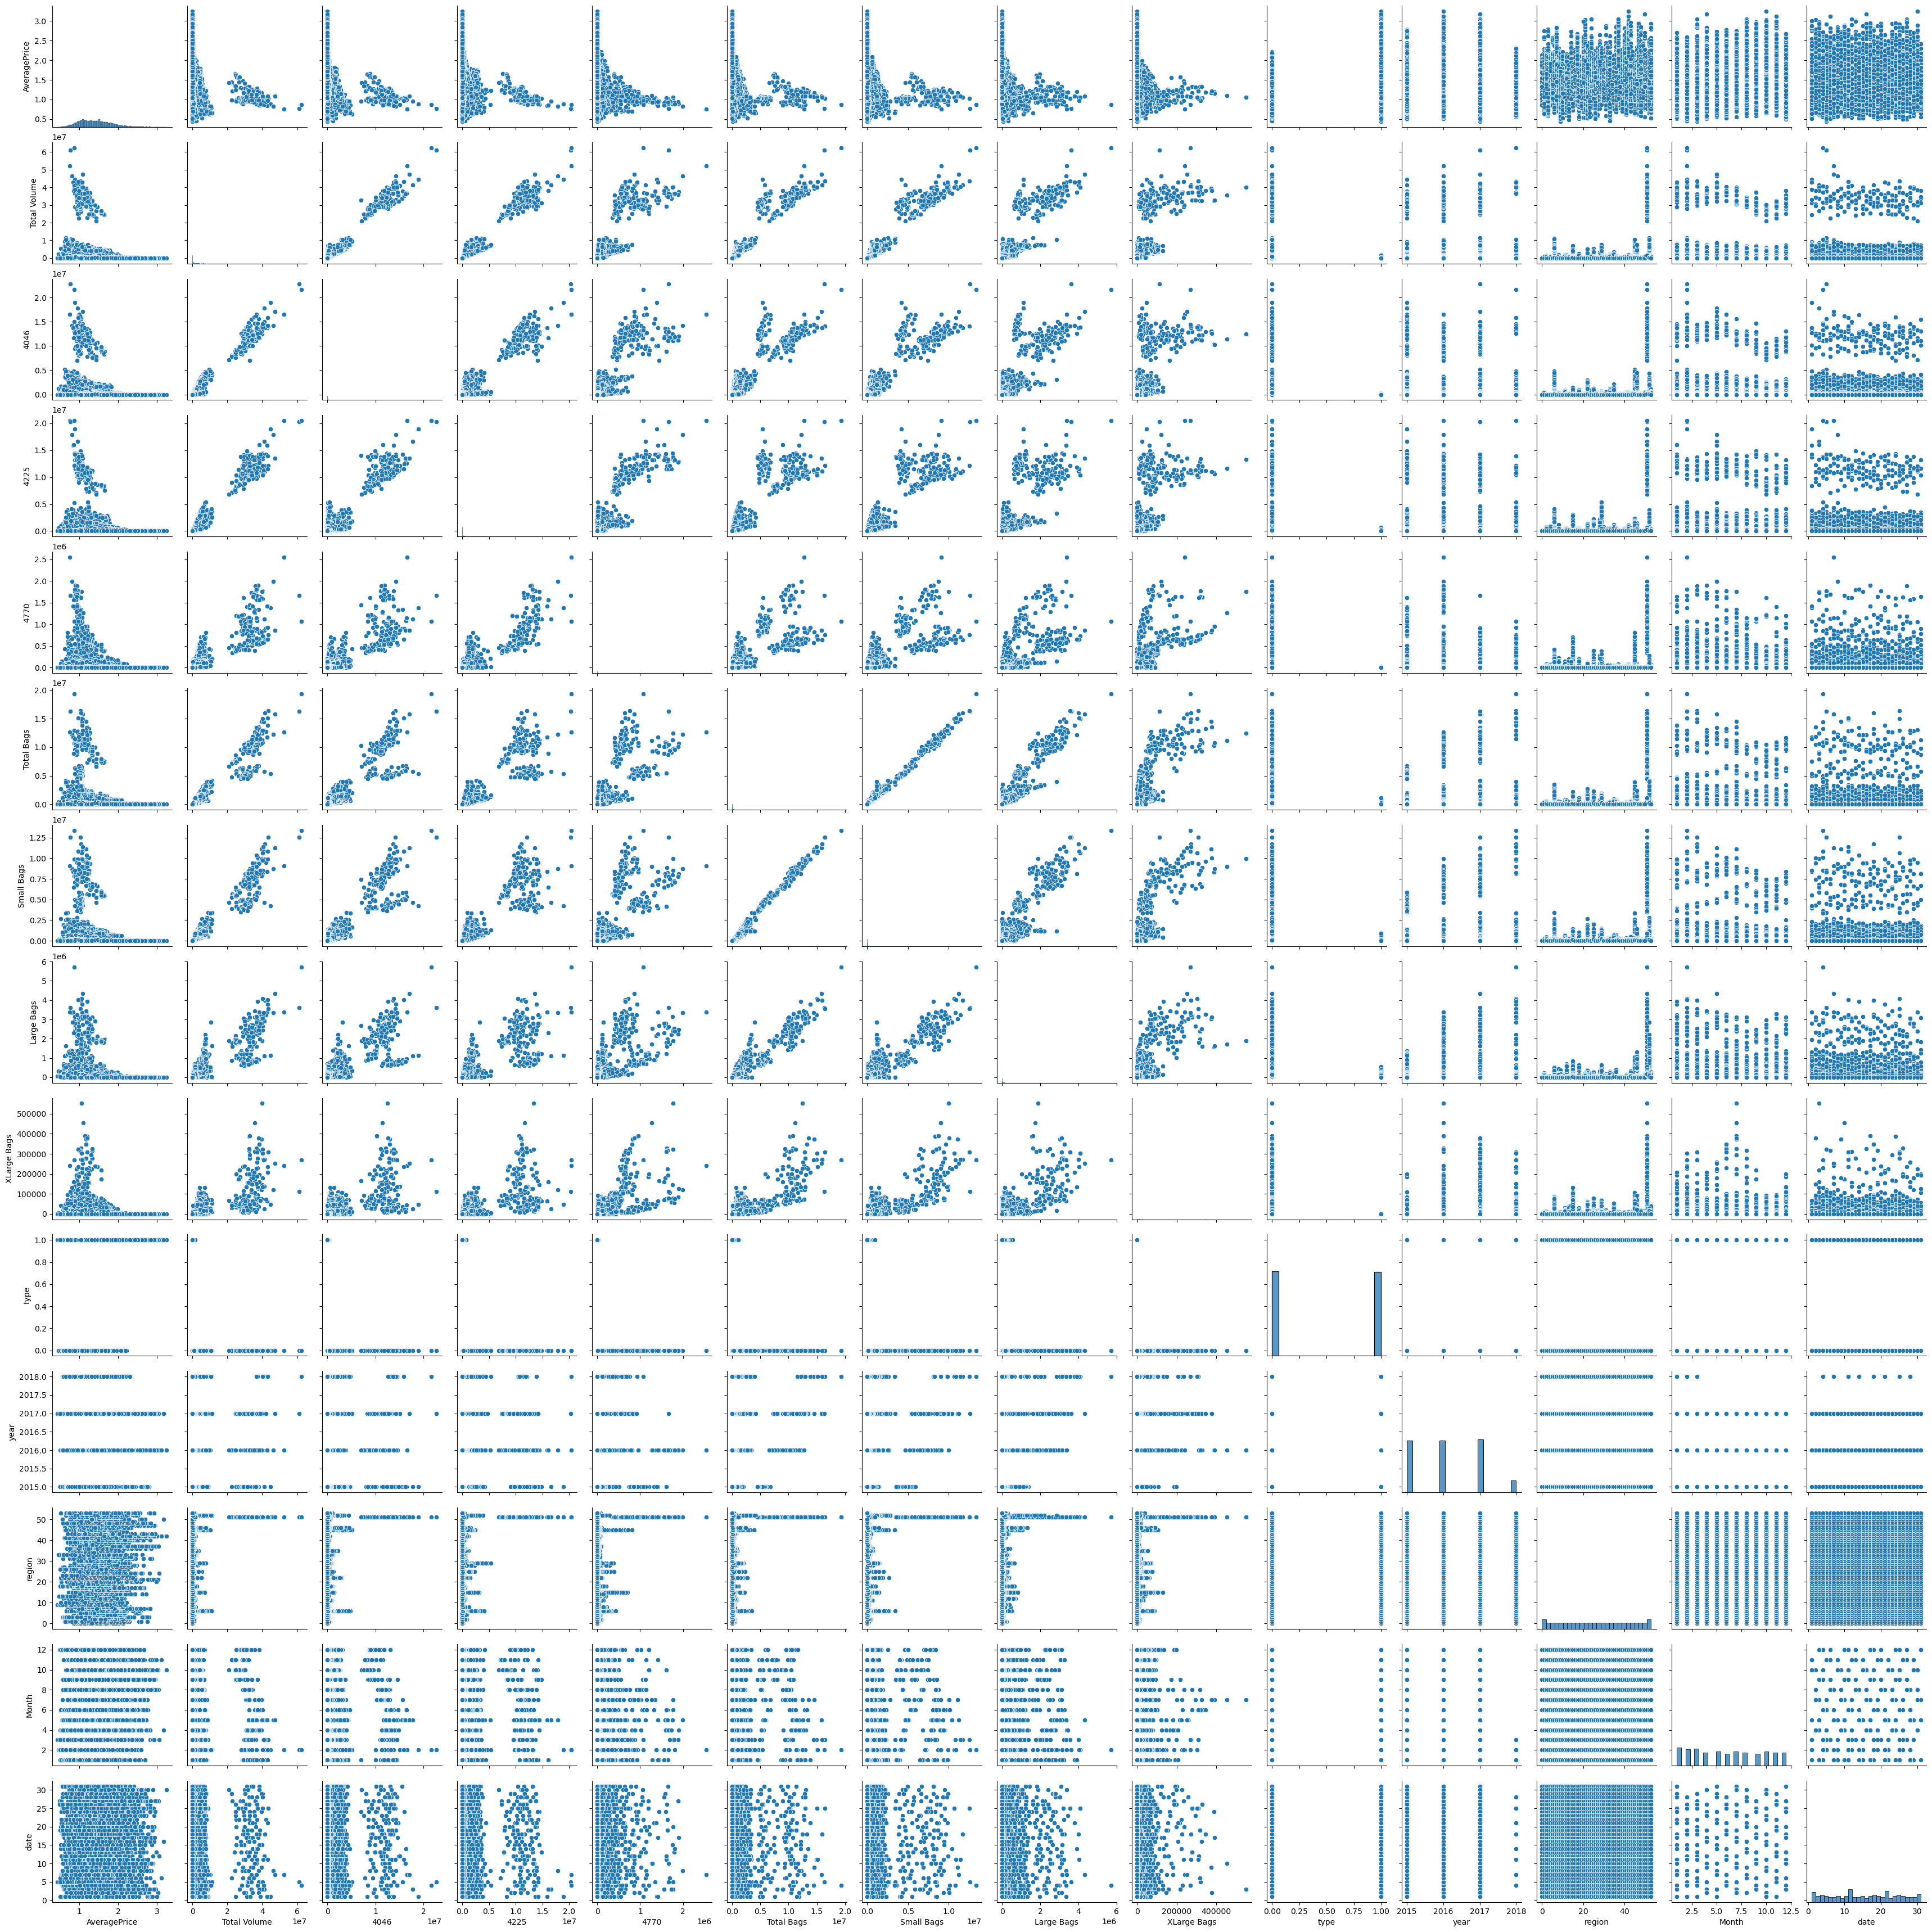

In [66]:
sns.pairplot(df)

# Checking outliers

In [67]:
### Checking for outliers using boxplot of univariate analysis

AveragePrice       AxesSubplot(0.125,0.653529;0.110714x0.226471)
Total Volume    AxesSubplot(0.257857,0.653529;0.110714x0.226471)
4046            AxesSubplot(0.390714,0.653529;0.110714x0.226471)
4225            AxesSubplot(0.523571,0.653529;0.110714x0.226471)
4770            AxesSubplot(0.656429,0.653529;0.110714x0.226471)
Total Bags      AxesSubplot(0.789286,0.653529;0.110714x0.226471)
Small Bags         AxesSubplot(0.125,0.381765;0.110714x0.226471)
Large Bags      AxesSubplot(0.257857,0.381765;0.110714x0.226471)
XLarge Bags     AxesSubplot(0.390714,0.381765;0.110714x0.226471)
type            AxesSubplot(0.523571,0.381765;0.110714x0.226471)
year            AxesSubplot(0.656429,0.381765;0.110714x0.226471)
region          AxesSubplot(0.789286,0.381765;0.110714x0.226471)
Month                  AxesSubplot(0.125,0.11;0.110714x0.226471)
date                AxesSubplot(0.257857,0.11;0.110714x0.226471)
dtype: object

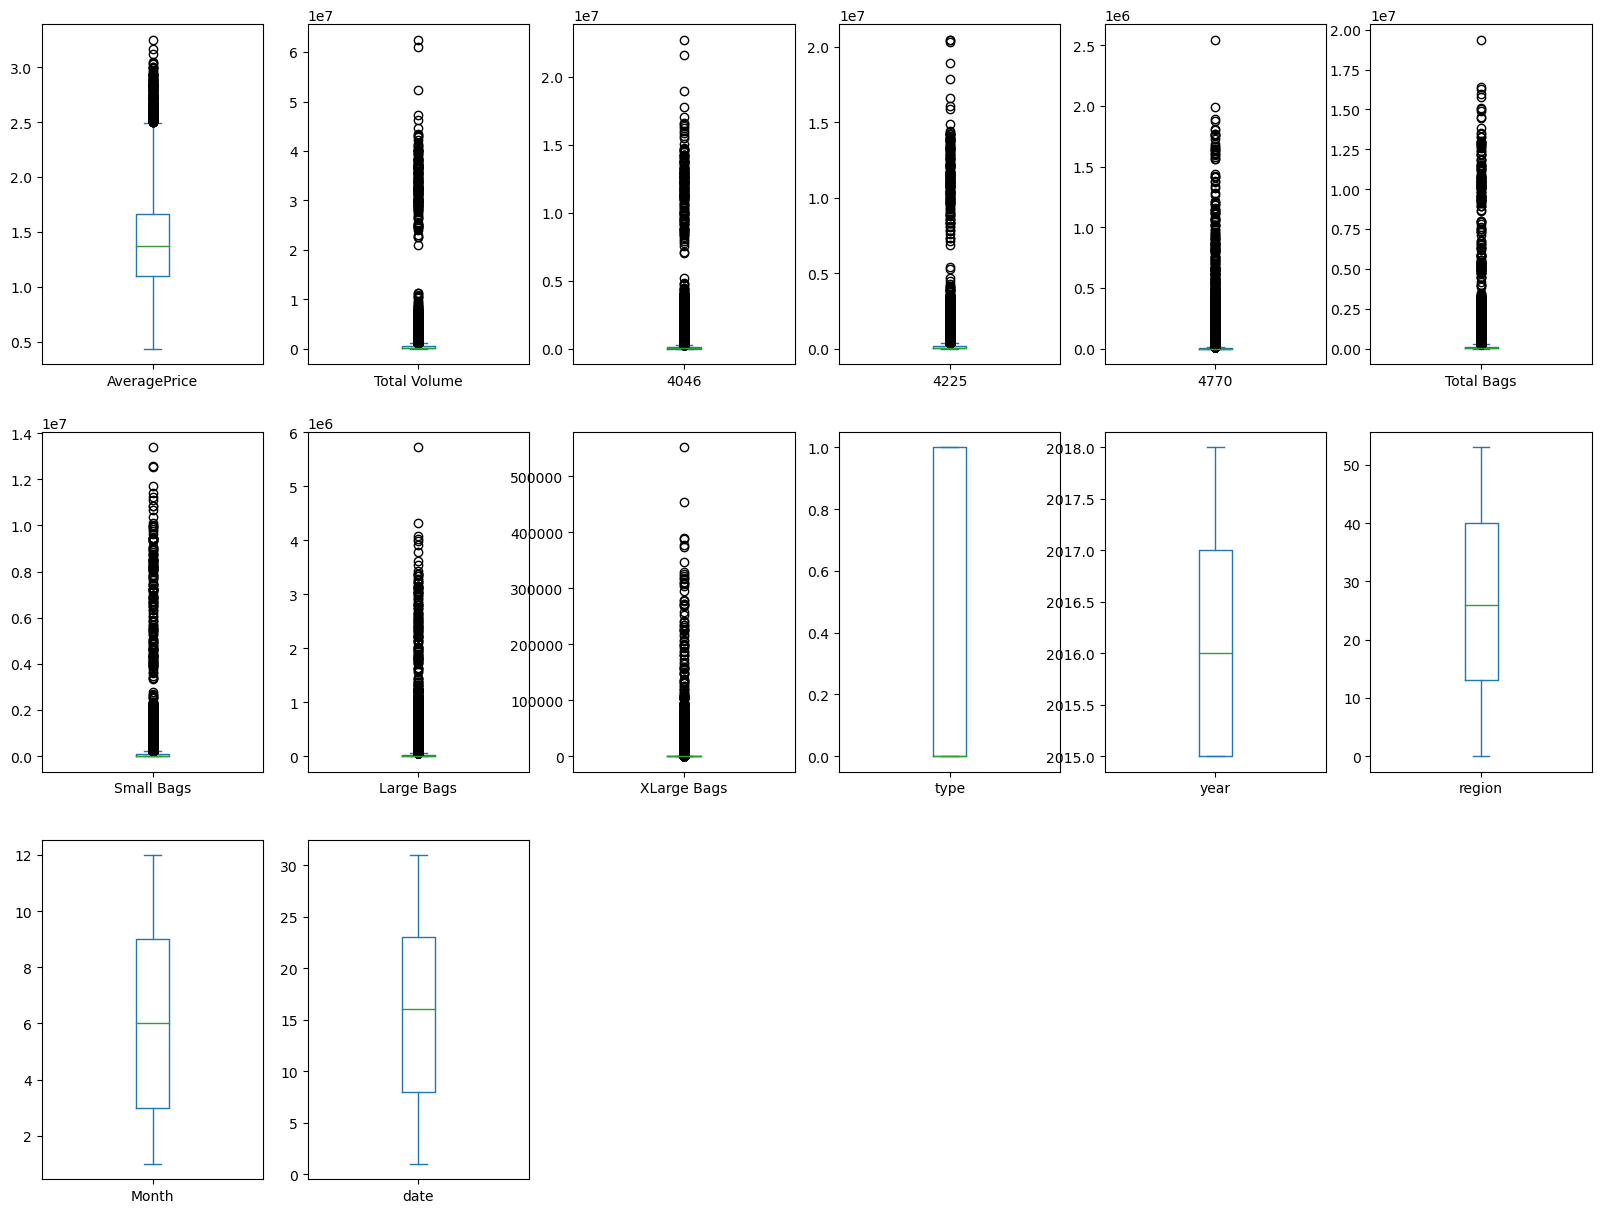

In [68]:
df.plot(kind='box',subplots=True,figsize=(20,15),layout=(3,6))

From above ploting we can see Outliers present in column 'Total Volume' and 'Total Bags'.<br>
We will now remove the Outliers through ZScore method.

## Removing outliers using Zscore 

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers:",df.shape)
print ("Shape of the dataframe after removing outliers:",df1.shape)
print ("Data loss post outlier removal:",((df.shape[0]-df1.shape[0])/df.shape[0]*100),'%')

Shape of the dataframe before removing outliers: (18249, 14)
Shape of the dataframe after removing outliers: (17651, 14)
Data loss post outlier removal: 3.276891884486821 %


As the data loss is less than 10%, it is acceptable.

In [70]:
df=df1.copy()

### Skewness

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

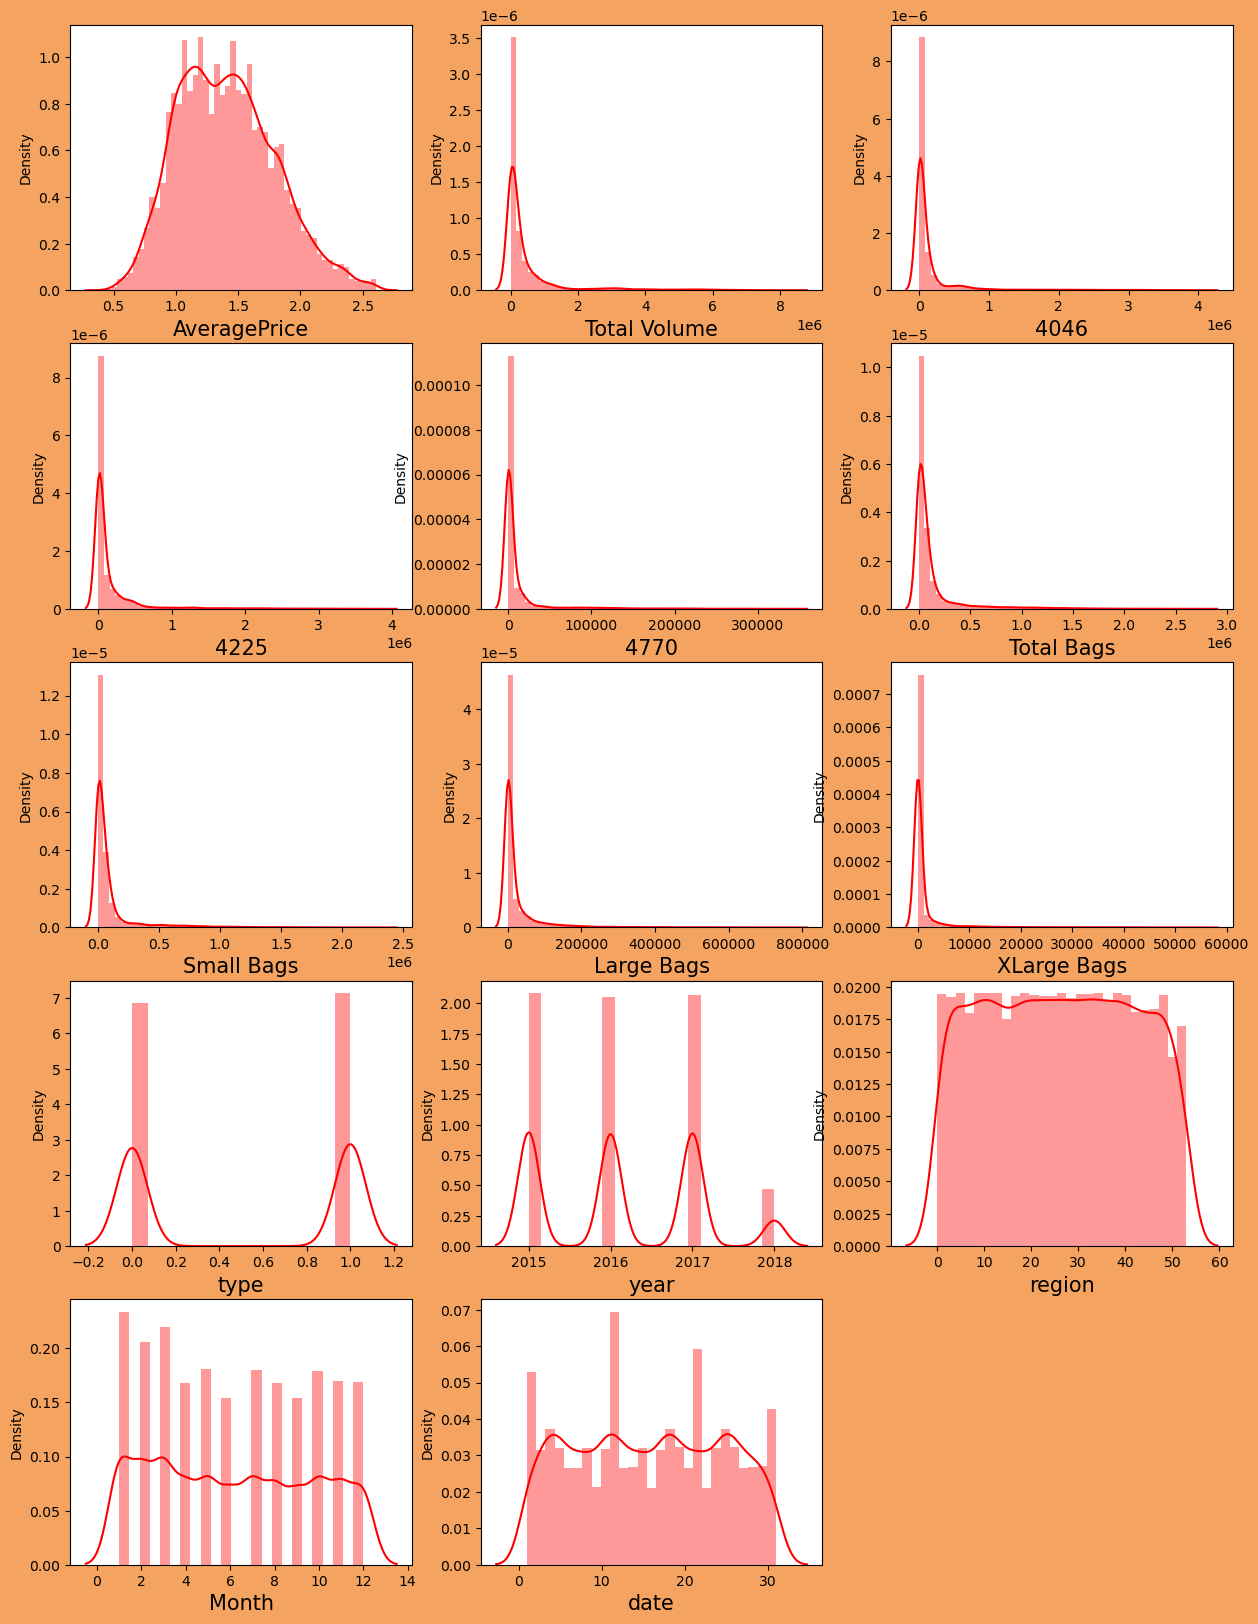

In [78]:
plt.figure(figsize=(15,20),facecolor='sandybrown')
pltno=1

for c in df:
    if pltno<=14:
        ax=plt.subplot(5,3,pltno)
        sns.distplot(df[c],color='r')
        plt.xlabel(c,fontsize=15)
        
    pltno+=1
df1.skew()

From above ploting we can see skewness towards right on many features

In [79]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

### Removing Skewness

In [80]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [81]:
df1.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

Still we can see skewness on column XLarge Bags. Let's remove this through Log transform

In [82]:
# Removing skewness using log transformation
df1["XLarge Bags"] = np.log1p(df1["XLarge Bags"])

In [83]:
df1.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     0.911568
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

In [84]:
df1["XLarge Bags"] = np.cbrt(df1["XLarge Bags"])

In [85]:
df1.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     0.779064
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

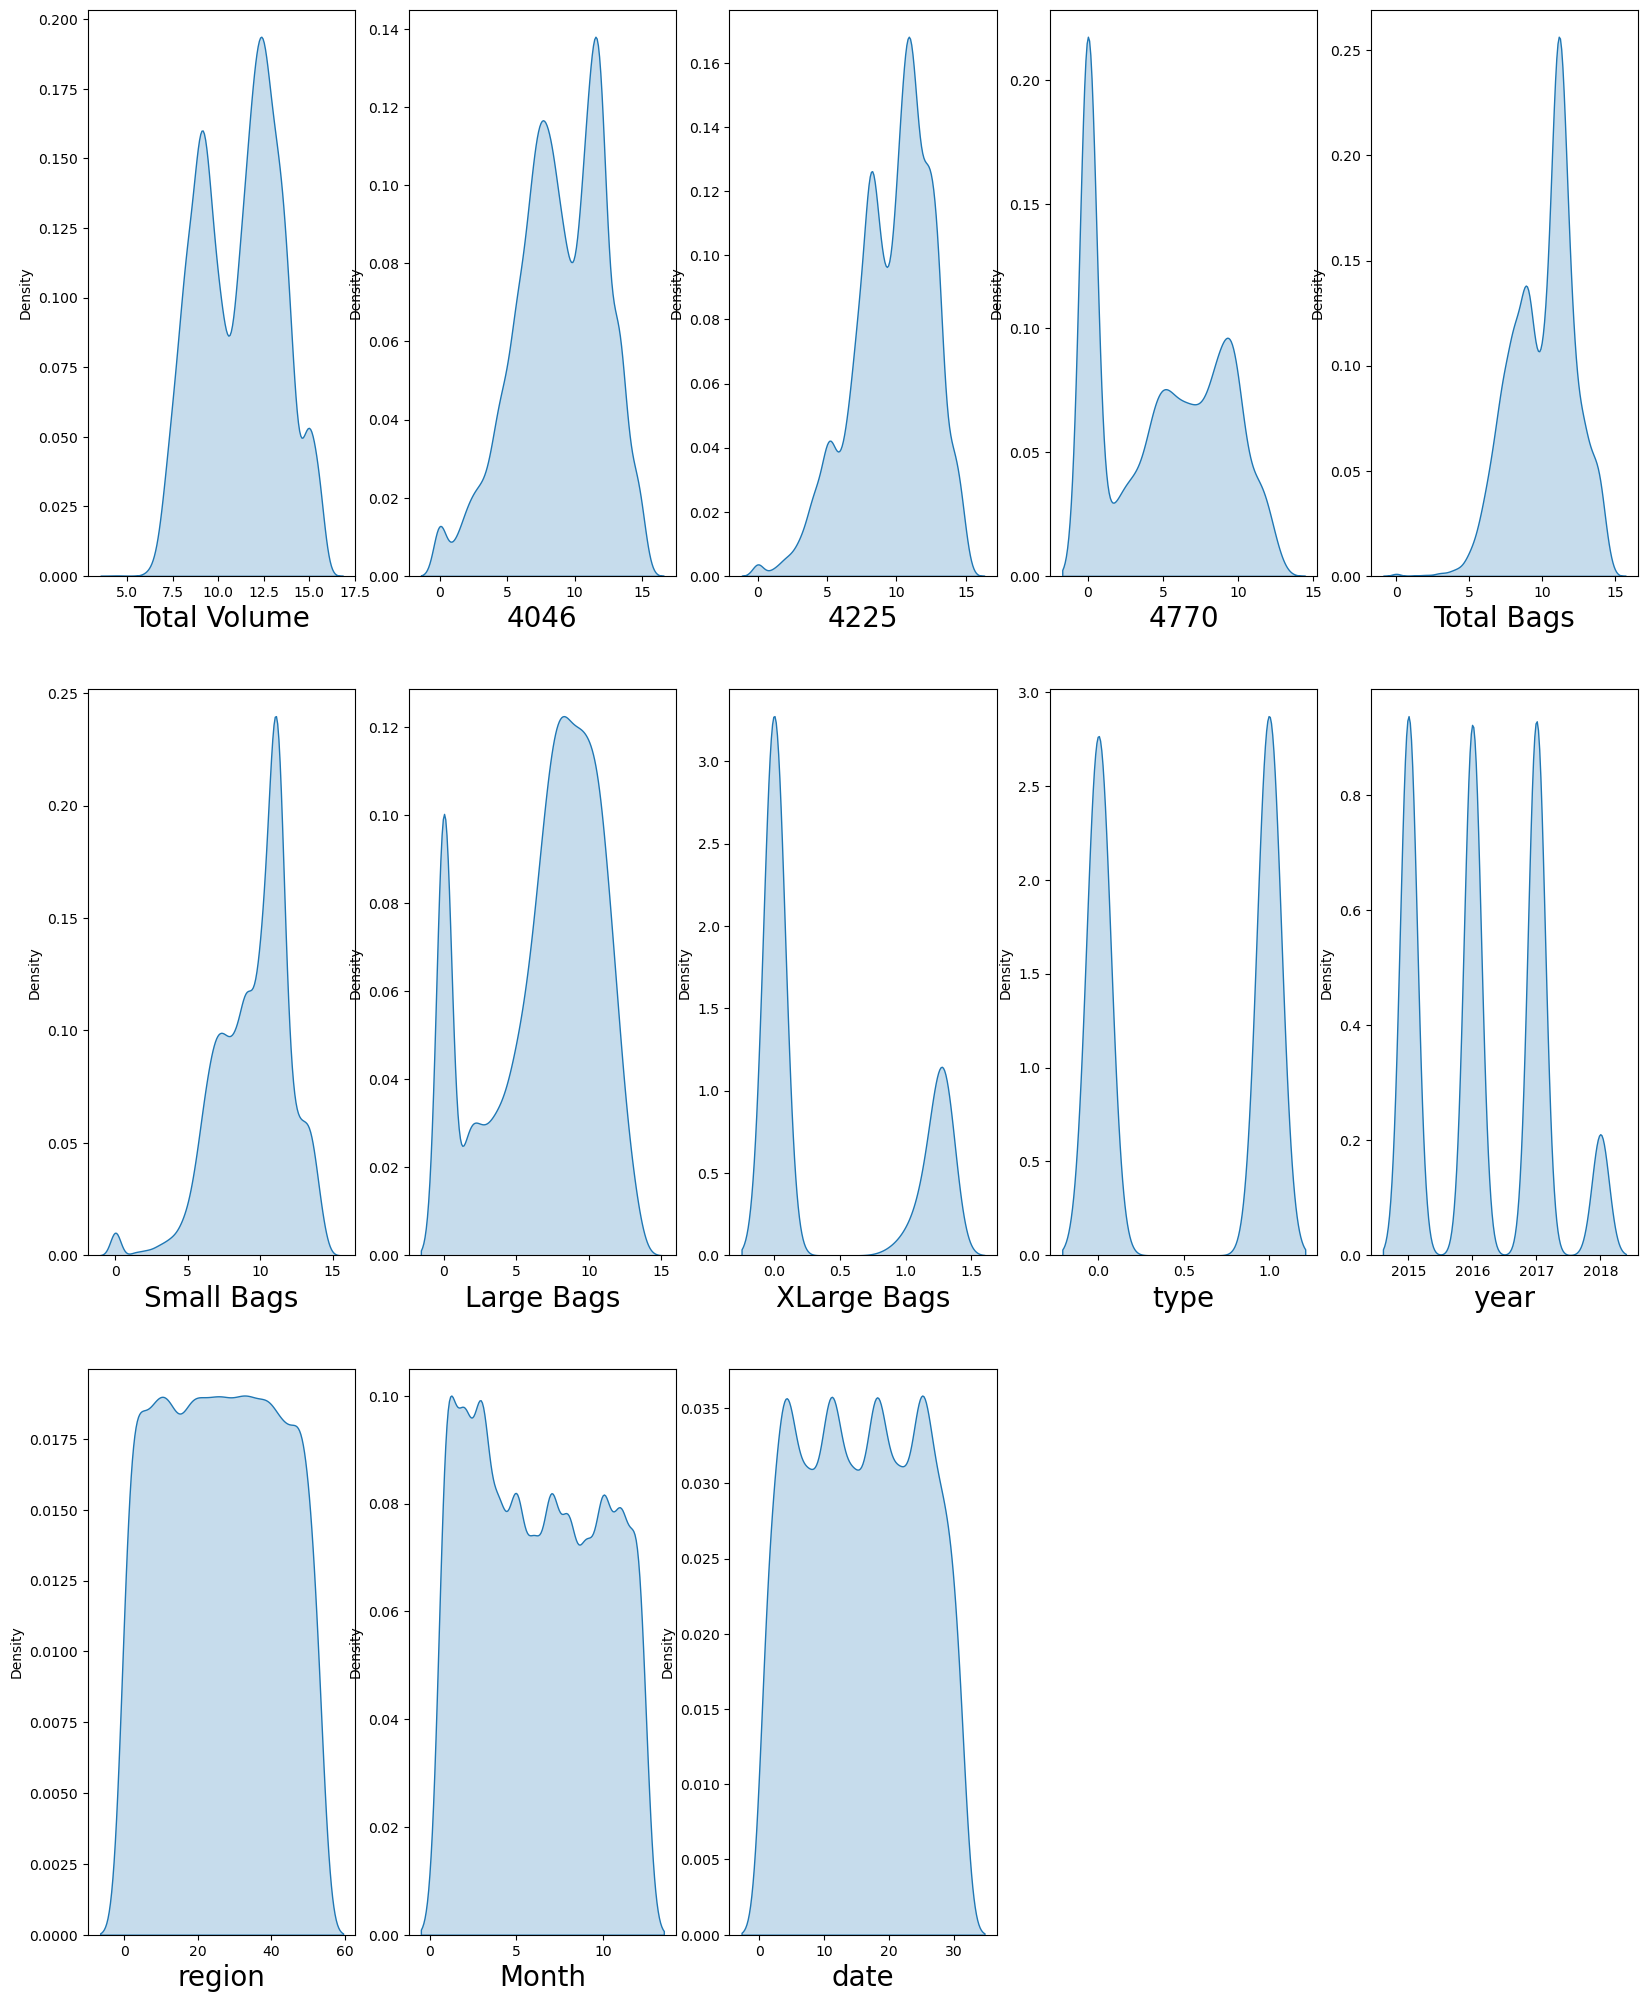

In [86]:
#checking the skewness again through Dist plot.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = df1.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df1[column], hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [90]:
# Dropping irrelevant columns
df1.drop("region",axis=1, inplace=True)
df1.drop("XLarge Bags",axis=1, inplace=True)

In [91]:
df1.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  type  year  Month  date  
0    9.060055    4.545951     0  2015     12    27  
1    9.149429    4.589955     0  2015     12    20  
2    8.992584    4.645736     0  2015     12    13  
3    8.644425    4.903495     0  2015     12     6  
4    8.697389    5.291746     0  2015     11    29

#### Splitting data in X&Y

In [92]:
x = df1.drop('AveragePrice', axis=1)
y = df1['AveragePrice']

## Scaling data with Standard scalar

In [93]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.061962 -0.587318  0.431565 -0.246207   -0.473426   -0.215789   
1     -0.134302 -0.719464  0.359601 -0.199437   -0.431908   -0.179590   
2      0.218235 -0.668997  0.683316 -0.001478   -0.504018   -0.243116   
3      0.033021 -0.560308  0.532565 -0.145897   -0.661685   -0.384129   
4     -0.167601 -0.616931  0.353051 -0.135308   -0.632653   -0.362677   

   Large Bags      type      year     Month      date  
0   -0.648254 -1.019047 -1.210013  1.644612  1.289309  
1   -0.636520 -1.019047 -1.210013  1.644612  0.491652  
2   -0.621646 -1.019047 -1.210013  1.644612 -0.306004  
3   -0.552915 -1.019047 -1.210013  1.644612 -1.103660  
4   -0.449388 -1.019047 -1.210013  1.362113  1.517211

scaled data using standard scaler.

## Checking Multicollinearity using VIF

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF Value
0   Total Volume  39.097928
1           4046   5.498706
2           4225   7.928195
3           4770   3.811918
4     Total Bags  21.874949
5     Small Bags   9.361682
6     Large Bags   2.652030
7           type   3.256993
8           year   1.337190
9          Month   1.050640
10          date   1.000575

VIF value more that 10 for Total Volume, 4046, 4225,Total Bags, Small Bags. These columns has multicollinearity issue. we have check one by one column having higher value first.

In [95]:
x.drop("Total Volume",axis=1,inplace=True)
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
X.head()

4046      4225      4770  Small Bags  Large Bags      type      year  \
0  0.112014 -2.122249  1.299086   -0.307908   -0.462517  0.806998  0.165951   
1  0.158811 -2.099124  0.508528   -0.405557   -0.475879  0.904052  0.140228   
2 -0.065435 -2.130547 -0.291254   -0.435508   -0.438105  1.000836 -0.043666   
3  0.049569 -2.101280 -1.082240   -0.539077   -0.324645  0.908913  0.164074   
4  0.101858 -1.941531  1.509218   -0.086198   -0.233065  0.906850  0.233682   

      Month      date  
0  0.319616 -0.796542  
1  0.197573 -0.784918  
2  0.404130 -0.695815  
3  0.438253 -0.683624  
4  0.256160 -0.674465

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF Value
0        4046   3.056366
1        4225   3.416146
2        4770   3.809111
3  Small Bags   3.095820
4  Large Bags   1.724480
5        type   3.124730
6        year   1.289010
7       Month   1.045408
8        date   1.000383

vif achieved less than 10

In [99]:
df1.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  type  year  Month  date  
0    9.060055    4.545951     0  2015     12    27  
1    9.149429    4.589955     0  2015     12    20  
2    8.992584    4.645736     0  2015     12    13  
3    8.644425    4.903495     0  2015     12     6  
4    8.697389    5.291746     0  2015     11    29

## Modeling

#### Finding best random state

In [106]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("best accuracy/r2 score is ",maxAccu,"on Random_state ",maxRS)

best accuracy/r2 score is  0.5218221289831664 on Random_state  56


Maximum r2 score is 52.18% and random state is 56

In [113]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(), SVR()]

In [114]:
for m in models:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('For',m)
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred),'\n')

For LinearRegression()
R2 score : 0.5059698162632844
Mean absolute error:  0.20907841085505802
Mean squared error:  0.07115013601121736 

For RandomForestRegressor()
R2 score : 0.8599942826496889
Mean absolute error:  0.10108081570996975
Mean squared error:  0.020163597609516606 

For KNeighborsRegressor()
R2 score : 0.7562768825317969
Mean absolute error:  0.13841125377643507
Mean squared error:  0.035100958459214494 

For DecisionTreeRegressor()
R2 score : 0.7006561743665607
Mean absolute error:  0.13867069486404834
Mean squared error:  0.04311144259818731 

For KNeighborsRegressor()
R2 score : 0.7562768825317969
Mean absolute error:  0.13841125377643507
Mean squared error:  0.035100958459214494 

For SGDRegressor()
R2 score : 0.5037623841421197
Mean absolute error:  0.2094630953335649
Mean squared error:  0.07146804997847428 

For GradientBoostingRegressor()
R2 score : 0.7179229731764374
Mean absolute error:  0.1546615097129873
Mean squared error:  0.040624681415887196 

For SVR()
R

we can see that RandomForestRegressor is giving best accuracy. 86%

## CROSS VALIDATION

In [116]:
for m in models:
    cvs=cross_val_score(m,x,y,cv=5)
    print('For',m,'\n',cvs)
    print(cvs.mean(),'\n')

For LinearRegression() 
 [-0.41724089  0.16111026  0.43818892  0.15171277  0.1677074 ]
0.1002956934989943 

For RandomForestRegressor() 
 [-0.23745757  0.48889779  0.58589844  0.32492617 -0.01646642]
0.22915968194063754 

For KNeighborsRegressor() 
 [-0.28998088  0.45163137  0.57975012  0.04688809 -0.06160532]
0.1453366784392577 

For DecisionTreeRegressor() 
 [-0.86835871  0.00947641  0.31966462 -0.28477966 -0.48233887]
-0.2612672417944698 

For KNeighborsRegressor() 
 [-0.28998088  0.45163137  0.57975012  0.04688809 -0.06160532]
0.1453366784392577 

For SGDRegressor() 
 [-0.46577117  0.14955319  0.43957932  0.15696121  0.17023204]
0.0901109183467591 

For GradientBoostingRegressor() 
 [0.07435796 0.5570773  0.63084366 0.34374963 0.17683018]
0.35657174731103414 

For SVR() 
 [-0.31705443  0.60583705  0.55111844  0.28860455 -0.18553804]
0.18859351393707285 



From the above observation, looking at the difference of R2 score and the cross validation score we conclude that Gradient Boosting is our best fitting model

# Hyperparameter tuning

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [159]:
grid_search.best_score_

0.8471487985604046

In [161]:
Avocado = RandomForestRegressor(bootstrap=True, max_depth=None, max_features="sqrt", min_samples_leaf=3, min_samples_split=2, n_estimators=200)

Avocado.fit(x_train, y_train)
pred_avocado = Avocado.predict(x_test)

print('R2_score:',r2_score(y_test,pred_avocado))
print('Mean abs error(MAE):',mean_absolute_error(y_test, pred_avocado))
print('Mean squared error(MSE):',mean_squared_error(y_test, pred_avocado))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_avocado)))

R2_score: 0.84383356959164
Mean abs error(MAE): 0.10895255050920376
Mean squared error(MSE): 0.022491060525691827
Root Mean squared error(RMSE): 0.14997019879193274


Model r2 score is 84.38%

### Saving the model

In [173]:
# Saving the model using .pkl
import joblib
joblib.dump(Avocado,"Avocado_Price.pkl")

['Avocado_Price.pkl']

In [174]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [176]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [178]:
testing_data_prediction = model.predict(x_test)

In [179]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)
score

0.8589574789643375

In [184]:
X.head(2)

4046      4225      4770  Small Bags  Large Bags      type      year  \
0  0.112014 -2.122249  1.299086   -0.307908   -0.462517  0.806998  0.165951   
1  0.158811 -2.099124  0.508528   -0.405557   -0.475879  0.904052  0.140228   

      Month      date  
0  0.319616 -0.796542  
1  0.197573 -0.784918

In [186]:
df.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  type  year  Month  date  
0     8603.62       93.25     0  2015     12    27  
1     9408.07       97.49     0  2015     12    20

In [187]:
#BULDING THE PREDICTION SYSTEM
input_data = (0.112014,-2.122249,1.299086,-0.307908,-0.462517,0.806998,0.165951,0.319616,-0.796542)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Average Price : ',str(prediction))

Predicted Average Price :  [1.4544]


### Predicting the saved model

In [188]:
# Loading the saved model
model=joblib.load("Avocado_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.49472302, 1.07796403, 1.29748597, ..., 2.09311317, 1.16051678,
       2.04194484])

In [189]:
prediction_=pd.DataFrame({'predicted values':prediction,'actual values':y_test})
prediction_

predicted values  actual values
15355          1.494723           1.13
1841           1.077964           1.13
3095           1.297486           1.23
5277           1.037132           1.09
38             1.210882           1.16
...                 ...            ...
7975           1.323378           1.17
10991          1.725693           1.68
17570          2.093113           2.01
14293          1.160517           1.26
9513           2.041945           2.05

[5296 rows x 2 columns]

Original and Predicted values are nearly very close.

## conclusion

Columns like Type of avocado, size and bags have impact on Average Price, lesser the RMSE value accurate the model is, when we consider Small Hass in Small Bags.

Random forest Regessor has more accuracy than other regression model for this dataset , accuracy is 0.86 it may also denote it is overfitting as it even classifies the outliers perfectly.

Random Forest Regressor model predicts the average price more accurately than other regression model.

# 2.Region using Classification

In [194]:
#Importing the Dataset
avacadoDf_cl=pd.read_csv('avocado.csv',index_col=0)
avacadoDf_cl.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [195]:
#Splitting the Date to Year, Month and Day

avacadoDf_cl['Year'], avacadoDf_cl['Month'], avacadoDf_cl['Day'] = avacadoDf_cl['Date'].str.split('-').str
avacadoDf_cl.drop(columns=['Date','year'], inplace=True)
avacadoDf_cl

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0           1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1           1.35      54876.98   674.28   44638.81   58.33     9505.56   
2           0.93     118220.22   794.70  109149.67  130.50     8145.35   
3           1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4           1.28      51039.60   941.48   43838.39   75.78     6183.95   
..           ...           ...      ...        ...     ...         ...   
7           1.63      17074.83  2046.96    1529.20    0.00    13498.67   
8           1.71      13888.04  1191.70    3431.50    0.00     9264.84   
9           1.87      13766.76  1191.92    2452.79  727.94     9394.11   
10          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
11          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

    Small Bags  Large Bags  XLarge Bags          type            region  Year  \
0      8603.62       93.25          0.0  conventional            Albany  2015   
1      9408.07       97.49          0.0  conventional            Albany  2015   
2      8042.21      103.14          0.0  conventional            Albany  2015   
3      5677.40      133.76          0.0  conventional            Albany  2015   
4      5986.26      197.69          0.0  conventional            Albany  2015   
..         ...         ...          ...           ...               ...   ...   
7     13066.82      431.85          0.0       organic  WestTexNewMexico  2018   
8      8940.04      324.80          0.0       organic  WestTexNewMexico  2018   
9      9351.80       42.31          0.0       organic  WestTexNewMexico  2018   
10    10919.54       50.00          0.0       organic  WestTexNewMexico  2018   
11    11988.14       26.01          0.0       organic  WestTexNewMexico  2018   

   Month Day  
0     12  27  
1     12  20  
2     12  13  
3     12  06  
4     11  29  
..   ...  ..  
7     02  04  
8     01  28  
9     01  21  
10    01  14  
11    01  07  

[18249 rows x 14 columns]

In [196]:
#Converting Object datatype for column Yesr to integer type after splitting.

avacadoDf_cl['Year']=avacadoDf_cl['Year'].astype(int)
avacadoDf_cl['Month']=avacadoDf_cl['Month'].astype(int)
avacadoDf_cl['Date']=avacadoDf_cl['Day'].astype(int)
avacadoDf_cl.drop(columns=['Day'], inplace=True)

separating the Numerical and Catagorical columns

In [198]:
category_data=[]
for i in avacadoDf_cl.dtypes.index:
    if avacadoDf_cl.dtypes[i]=='object':
        category_data.append(i)
print("categorial data:",category_data)
print("\n")

numerical_data=[]
for j in avacadoDf_cl.dtypes.index:
    if avacadoDf_cl.dtypes[j]!='object':
        numerical_data.append(j)
print("Numerical data:",numerical_data)

categorial data: ['type', 'region']


Numerical data: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Year', 'Month', 'Date']


In [199]:
avacadoDf_cl['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [200]:
avacadoDf_cl['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Outliers

In first case we have Outliers present in the dataset. Let's remove them

In [201]:
# Features containing outliers
features = avacadoDf_cl[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [202]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0       0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1       0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2       0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3       0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4       0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
..           ...       ...       ...       ...         ...         ...   
7       0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
8       0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
9       0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
10      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
11      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

    Large Bags  XLarge Bags  
0     0.222352      0.17558  
1     0.222335      0.17558  
2     0.222311      0.17558  
3     0.222186      0.17558  
4     0.221924      0.17558  
..         ...          ...  
7     0.220964      0.17558  
8     0.221403      0.17558  
9     0.222561      0.17558  
10    0.222529      0.17558  
11    0.222628      0.17558  

[18249 rows x 8 columns]

In [203]:
# Creating new dataframe
new_df1 = avacadoDf_cl[(z<3).all(axis=1)] 
new_df1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0           1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1           1.35      54876.98   674.28   44638.81   58.33     9505.56   
2           0.93     118220.22   794.70  109149.67  130.50     8145.35   
3           1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4           1.28      51039.60   941.48   43838.39   75.78     6183.95   
..           ...           ...      ...        ...     ...         ...   
7           1.63      17074.83  2046.96    1529.20    0.00    13498.67   
8           1.71      13888.04  1191.70    3431.50    0.00     9264.84   
9           1.87      13766.76  1191.92    2452.79  727.94     9394.11   
10          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
11          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

    Small Bags  Large Bags  XLarge Bags          type            region  Year  \
0      8603.62       93.25          0.0  conventional            Albany  2015   
1      9408.07       97.49          0.0  conventional            Albany  2015   
2      8042.21      103.14          0.0  conventional            Albany  2015   
3      5677.40      133.76          0.0  conventional            Albany  2015   
4      5986.26      197.69          0.0  conventional            Albany  2015   
..         ...         ...          ...           ...               ...   ...   
7     13066.82      431.85          0.0       organic  WestTexNewMexico  2018   
8      8940.04      324.80          0.0       organic  WestTexNewMexico  2018   
9      9351.80       42.31          0.0       organic  WestTexNewMexico  2018   
10    10919.54       50.00          0.0       organic  WestTexNewMexico  2018   
11    11988.14       26.01          0.0       organic  WestTexNewMexico  2018   

    Month  Date  
0      12    27  
1      12    20  
2      12    13  
3      12     6  
4      11    29  
..    ...   ...  
7       2     4  
8       1    28  
9       1    21  
10      1    14  
11      1     7  

[17782 rows x 14 columns]

In [204]:
# Checking the skewness
new_df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [205]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [206]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [207]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [208]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])

In [209]:
# Let's check the skewness again
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

XLarge Bags still has skewness. Let's drop it.

In [211]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)

In [212]:
new_df1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags          type  region  Year  Month  Date  
0   -0.337064   -0.775214  conventional  Albany  2015     12    27  
1   -0.301038   -0.765237  conventional  Albany  2015     12    20  
2   -0.364044   -0.752534  conventional  Albany  2015     12    13  
3   -0.500341   -0.693012  conventional  Albany  2015     12     6  
4   -0.479918   -0.600755  conventional  Albany  2015     11    29

## Encoding Catagorical Data

In [214]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)
new_df1[categorical_col]

type  region
0      0       0
1      0       0
2      0       0
3      0       0
4      0       0
..   ...     ...
7      1      53
8      1      53
9      1      53
10     1      53
11     1      53

[17782 rows x 2 columns]

# Correlation

In [215]:
cor = new_df1.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Date              0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags      type    region  \
AveragePrice   -0.564616   -0.493621   -0.477879  0.608447  0.010428   
Total Volume    0.939776    0.905098    0.681427 -0.800828  0.065709   
4046            0.799354    0.778765    0.601899 -0.725826  0.159390   
4225            0.818511    0.784901    0.614878 -0.747722  0.032273   
4770            0.761641    0.754305    0.548457 -0.780988  0.037805   
Total Bags      1.000000    0.949901    0.729652 -0.725686  0.065996   
Small Bags      0.949901    1.000000    0.566307 -0.720466  0.051985   
Large Bags      0.729652    0.566307    1.000000 -0.500026  0.086573   
type           -0.725686   -0.720466   -0.500026  1.000000  0.021970   
region          0.065996    0.051985    0.086573  0.021970  1.000000   
Year            0.210924    0.185955    0.190295  0.007399 -0.003610   
Month          -0.014571   -0.010260   -0.016942 -0.005044  0.002175   
Date           -0.003703   -0.000535   -0.000876 -0.002469  0.000751   

                  Year     Month      Date  
AveragePrice  0.099910  0.157900  0.024742  
Total Volume  0.076584 -0.026332 -0.006248  
4046         -0.002396 -0.025919 -0.004558  
4225         -0.004533 -0.024708 -0.005919  
4770         -0.051657 -0.017377  0.001383  
Total Bags    0.210924 -0.014571 -0.003703  
Small Bags    0.185955 -0.010260 -0.000535  
Large Bags    0.190295 -0.016942 -0.000876  
type          0.007399 -0.005044 -0.002469  
region       -0.003610  0.002175  0.000751  
Year          1.000000 -0.173166  0.004044  
Month        -0.173166  1.000000  0.010456  
Date          0.004044  0.010456  1.000000

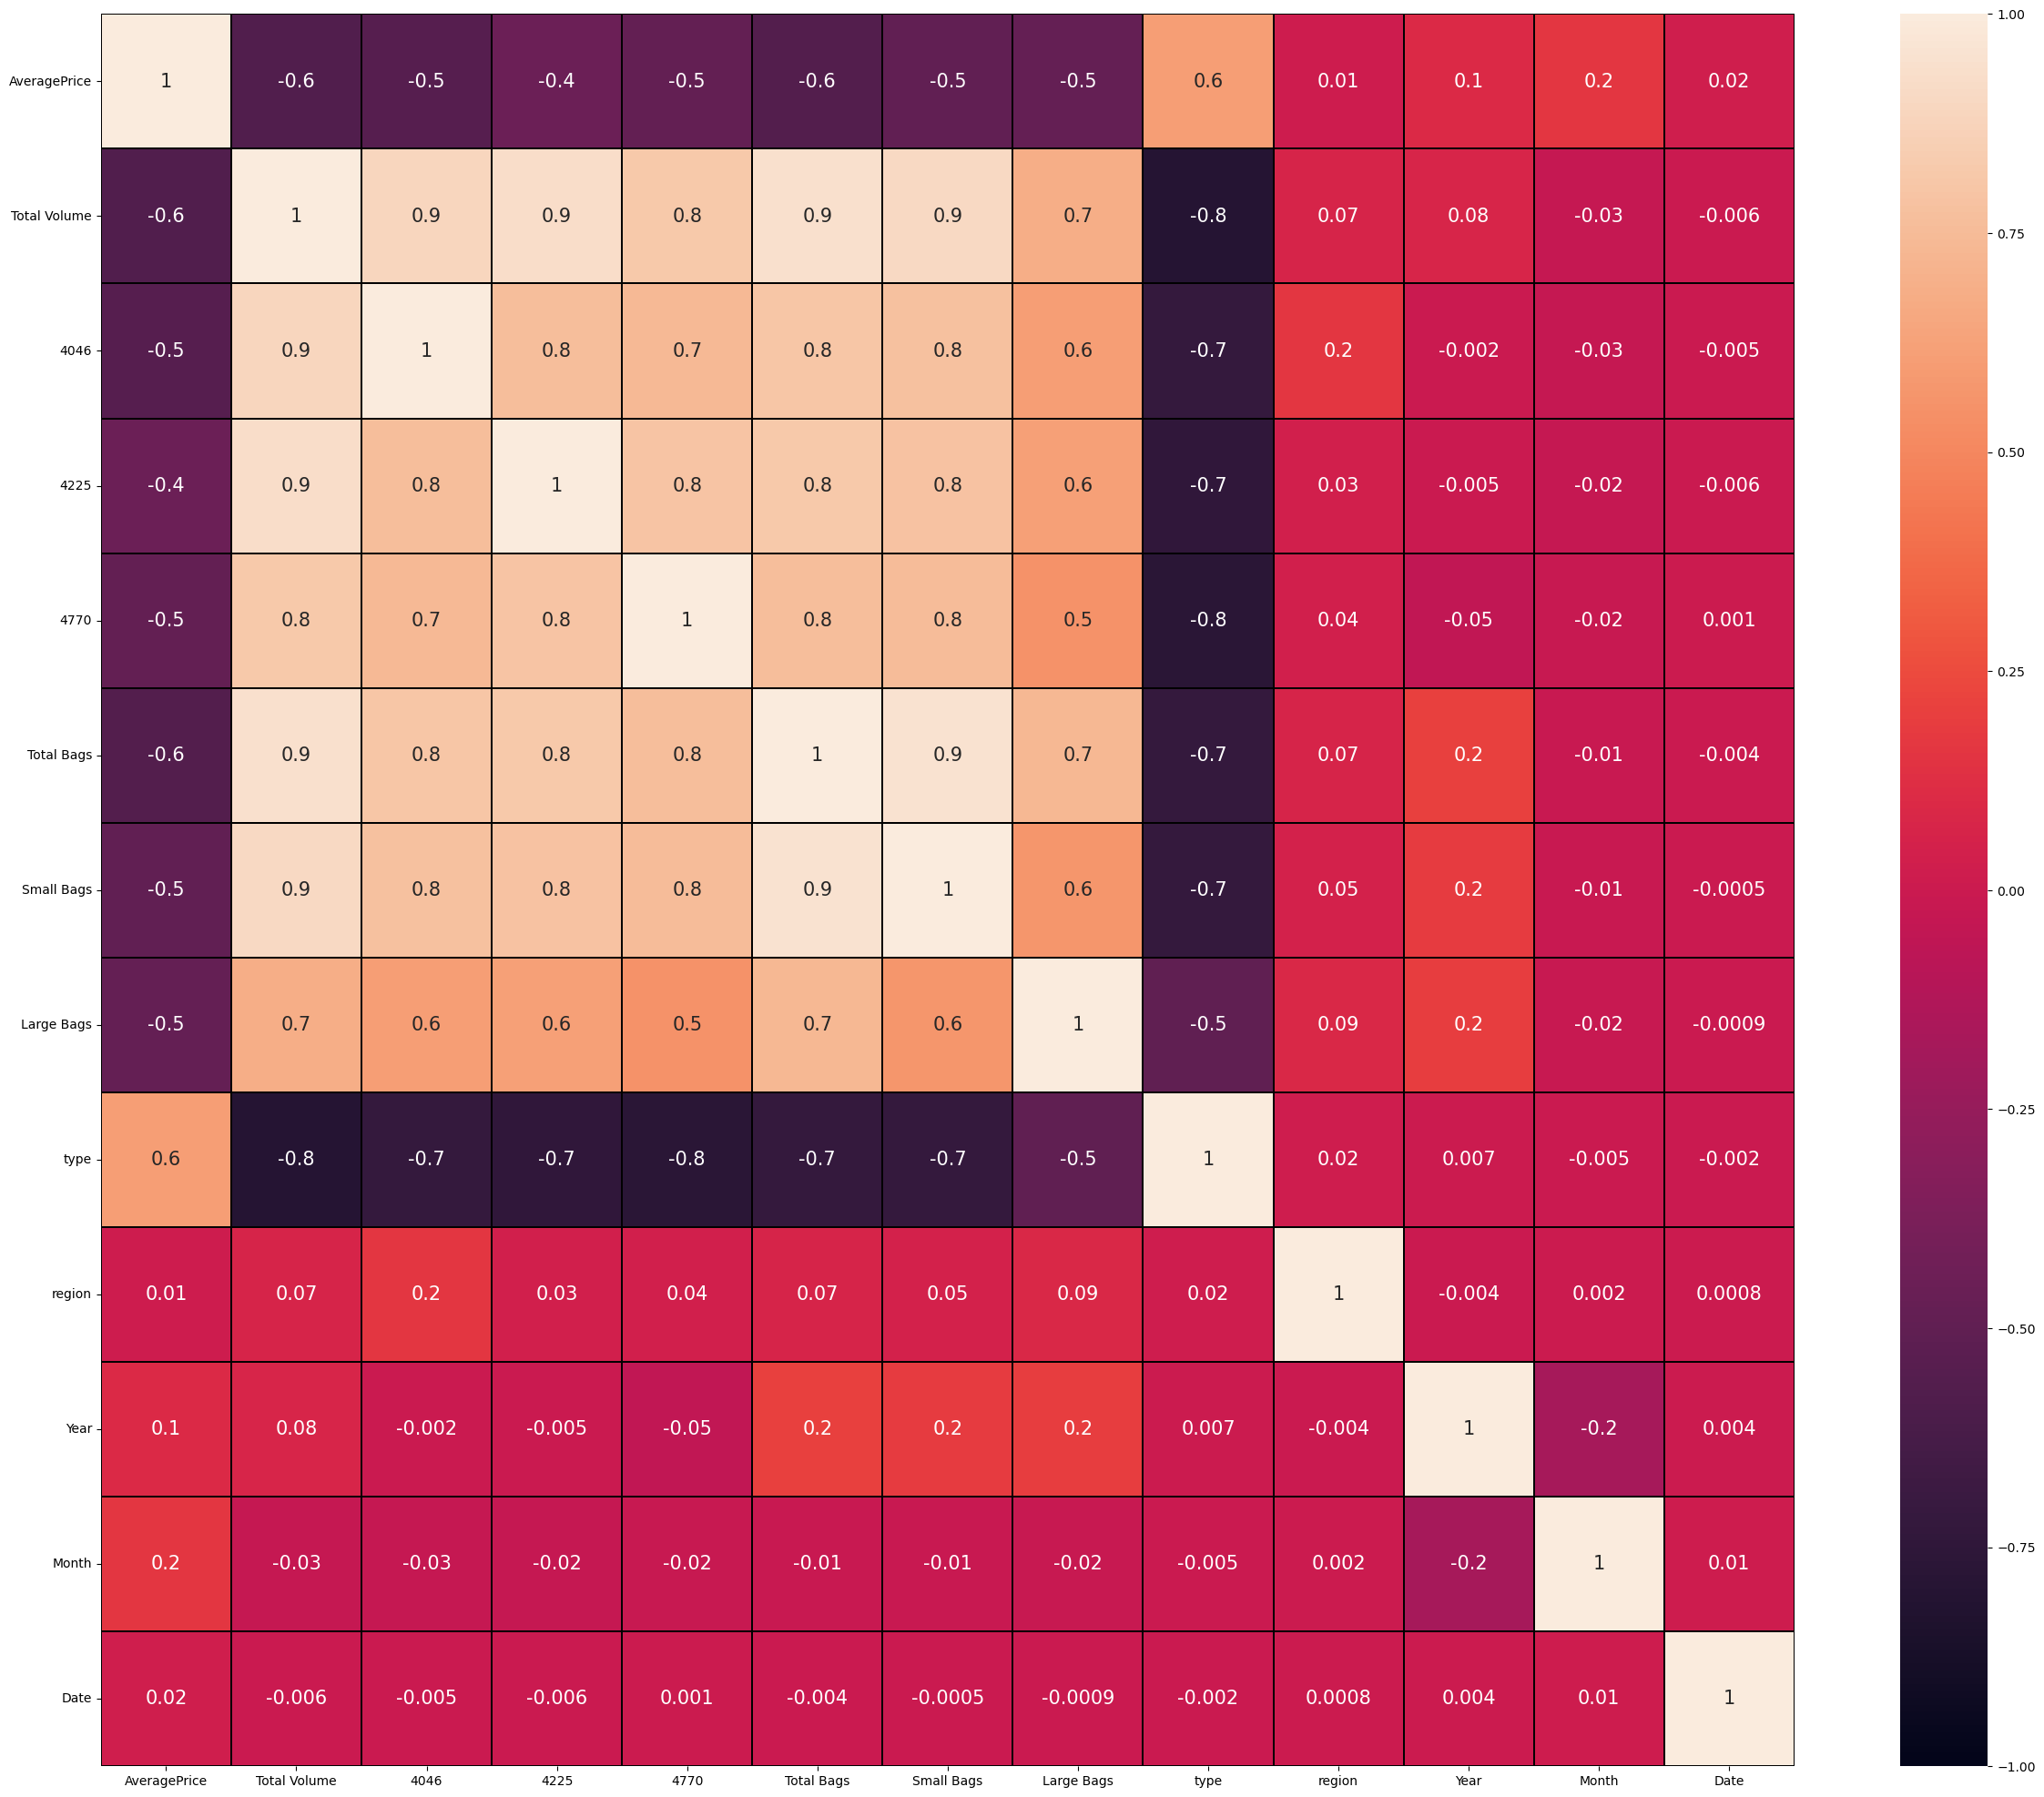

In [216]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(new_df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

In [217]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Date            0.000751
Year           -0.003610
Name: region, dtype: float64

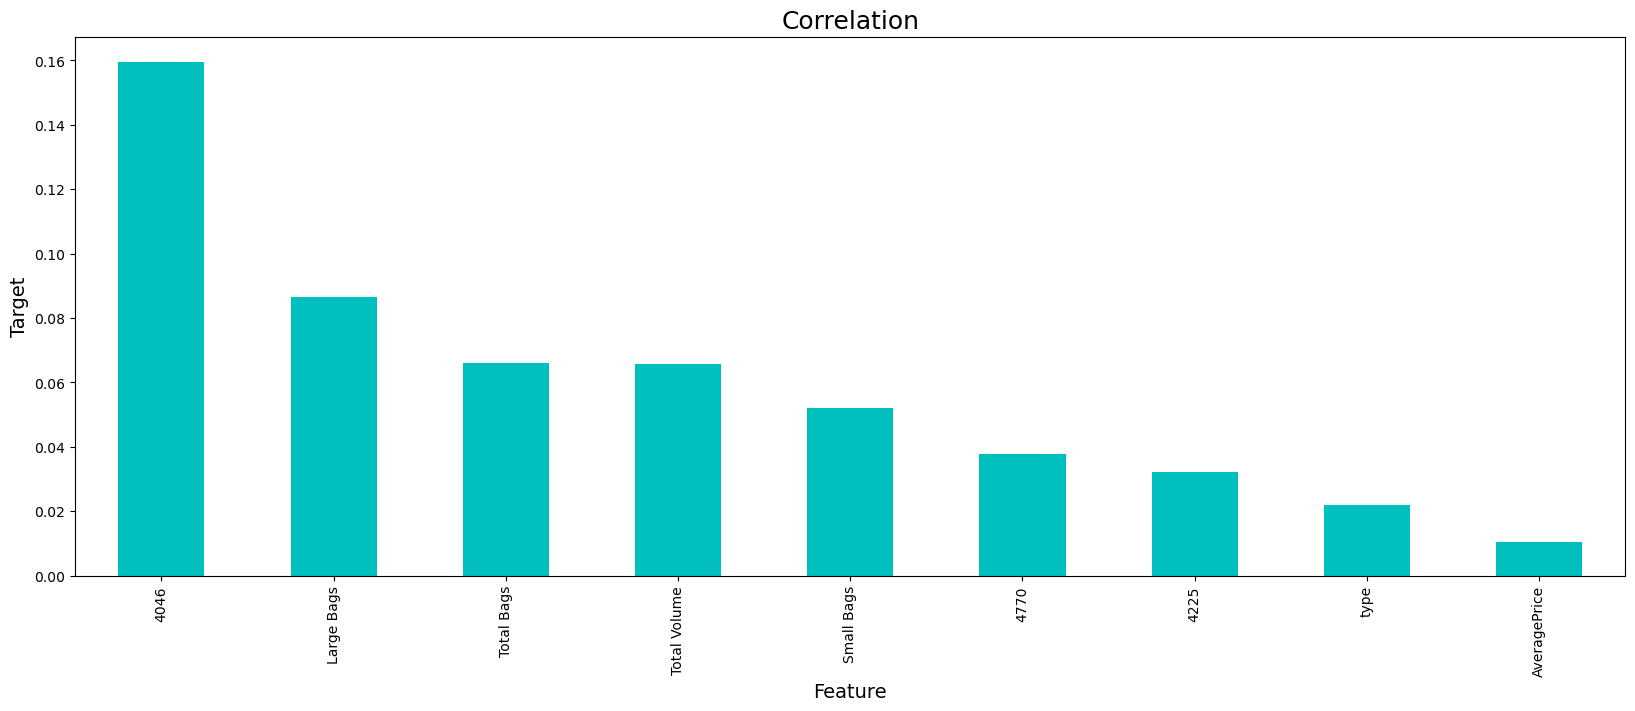

In [220]:
plt.figure(figsize=(20,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From above bar plot, we can see that there is no relation with Date, Year, Month and type. So we will drop these column.

In [219]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Date",axis=1, inplace=True)
new_df1.drop("Year",axis=1, inplace=True)

#### Data preprocessing

Separating the independent and target variables into x and y

In [221]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]

In [222]:
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0           1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1           1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2           0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3           1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4           1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
..           ...           ...       ...       ...       ...         ...   
7           1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
8           1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
9           1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
10          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
11          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

    Small Bags  Large Bags  type  
0    -0.337064   -0.775214     0  
1    -0.301038   -0.765237     0  
2    -0.364044   -0.752534     0  
3    -0.500341   -0.693012     0  
4    -0.479918   -0.600755     0  
..         ...         ...   ...  
7    -0.165765   -0.405895     1  
8    -0.321645   -0.478556     1  
9    -0.303466   -0.945246     1  
10   -0.240252   -0.910471     1  
11   -0.201685   -1.042930     1  

[17782 rows x 9 columns]

# Scaling data using Standar Scaler

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.212660     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1     -0.162942     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2     -1.207026      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3     -0.834139      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4     -0.336956     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags      type  
0   -0.337064   -0.775214 -1.026443  
1   -0.301038   -0.765237 -1.026443  
2   -0.364044   -0.752534 -1.026443  
3   -0.500341   -0.693012 -1.026443  
4   -0.479918   -0.600755 -1.026443

# Variance Inflation Factor(VIF)

In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values      Features
0    1.941903  AveragePrice
1   52.803808  Total Volume
2    6.694036          4046
3   11.900149          4225
4    3.756094          4770
5   34.110791    Total Bags
6   17.194519    Small Bags
7    3.434390    Large Bags
8    3.717587          type

In [225]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [226]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.884951  AveragePrice
1    3.485772          4046
2    4.355346          4225
3    3.742073          4770
4   25.424143    Total Bags
5   17.184510    Small Bags
6    3.381470    Large Bags
7    3.617215          type

In [227]:
# Dropping the feature Total Volume
x.drop("Total Bags",axis=1, inplace=True)

In [228]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.782355  AveragePrice
1    3.485146          4046
2    4.167858          4225
3    3.738406          4770
4    3.509222    Small Bags
5    1.840231    Large Bags
6    3.603878          type

now vif is stayed less than 10

## Modeling

#### Finding best random state

In [231]:
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7964462438146649  on Random_state  173


Here we are getting accuracy score of 79.64% with Random state 173

Now splitting the data for Training and Testing purpose. 75% we are considering for Training and 25% for Testing purpose

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

In [235]:
Model= [GaussianNB(),LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [237]:
for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:  0.44691857849752586

 Confusion matrix: 
 [[47  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 45 ...  0  0  1]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  5  1 ...  0  0  6]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.62      0.53        76
           1       0.24      0.37      0.30        94
           2       0.52      0.52      0.52        86
           3       0.61      0.38      0.47        95
           4       0.50      0.46      0.48       101
           5       0.54      0.34      0.41        83
           6       0.71      0.76      0.73        70
           7       0.41      0.45      0.43       100
           8       0.61      0.72      0.66        81
           9       0.42      0.75      0.54        75
          10       0.45      0.25      0.33        79
          11       0.60      0.61      0.60        79
          12       0.24     

Best Accuracy score of RandomForestClassifier() is:  89.72%

In [238]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [239]:
pred = rfc.predict(x_test)
ls=accuracy_score(y_test,pred)
lscore= cross_val_score(rfc,x_train,y_train)
lsc=lscore.mean()

lscore_selected=cross_val_score(rfc,x_train,y_train,cv=6).mean()
print("The cv score is: ", lscore_selected,"\nThe accuracy score is: ", ls)

The cv score is:  0.8835476327659757 
The accuracy score is:  0.8990103463787674


## Hyperparameter Tuning

In [240]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2'}

In [241]:
final_model=RandomForestClassifier(max_features='sqrt',criterion='entropy',max_depth=100)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 90.05847953216374


After tuning, our best model score has increased

In [260]:
x.head(2)

AveragePrice      4046      4225      4770  Small Bags  Large Bags  \
0     -0.212660 -0.649918  0.358278 -0.212550   -0.337064   -0.775214   
1     -0.162942 -0.770067  0.276355 -0.165117   -0.301038   -0.765237   

       type  
0 -1.026443  
1 -1.026443

In [252]:
avacadoDf_cl.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags          type  region  Year  Month  \
0     8603.62       93.25          0.0  conventional  Albany  2015     12   
1     9408.07       97.49          0.0  conventional  Albany  2015     12   

   Date  
0    27  
1    20

In [253]:
#BULDING THE PREDICTION SYSTEM
input_data = (1.33,1036.74,54454.85,48.16,8603.62,93.25,-1.02355)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted passenger data:",str(prediction))

Predicted passenger data: [6]


### getting right prediction. so let's save the model

# Saving the trained model

In [255]:
# Saving the model using .pkl
import joblib
joblib.dump(final_model,"Avocado_Region.pkl")

['Avocado_Region.pkl']

In [256]:
hs= joblib.load(open('Avocado_Region.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

90.05847953216374


In [258]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(10)

original  predicted
0        23         23
1        25         25
2        36         36
3         9          9
4        21         21
5        30         30
6        19         19
7         8          8
8         3         23
9        26         26

90.56% results predicted accurately

# conclusion

#We investigated the data, checking for data unbalancing, visualizing the features, and understanding the relationship between different features. We then investigated two predictive models. The data was split into three parts, a train set, a validation set, and a test set. For the first five base models, we only used the train and test set.

#We started with Linear Regression,Decision Tree, Random Forest and GradientBoosting,KNN and SGD for which we obtained RMSE of 0.07115,0.0431,0.04062,0.0351 and 0.07146 respectively, when predicting the target for the test set.

#We followed with  and optimizing it using Grid search CV and achieved rmse of (0.1499) for the prediction of the test set target values.

#And results were predicted for "average price" is = 85.89%
"Region" is = 90.56%

## --Thank you--